#Setup


In [ ]:
!pip install transformers

In [ ]:
import transformers
from transformers import AutoModelForSequenceClassification
from transformers import TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
import pandas as pd
from scipy.special import softmax
import csv
import urllib.request


tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

Downloading:   0%|          | 0.00/747 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

In [ ]:
task='emotion'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
labels=[]
mapping_link = f"https://raw.githubusercontent.com/cardiffnlp/tweeteval/main/datasets/{task}/mapping.txt"
with urllib.request.urlopen(mapping_link) as f:
    html = f.read().decode('utf-8').split("\n")
    csvreader = csv.reader(html, delimiter='\t')
labels = [row[1] for row in csvreader if len(row) > 1]
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
model.save_pretrained(MODEL)

Downloading:   0%|          | 0.00/779 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/878k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/446k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/150 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/476M [00:00<?, ?B/s]

#Brain Health Sentiment

In [ ]:
#Read file
datafile = open('Brain full.csv', 'r')
myreader = csv.reader(datafile)
anger=0
joy=0
sadness=0
optimism=0
#Open to write to new file
with open('Brain.csv', 'w') as new_file:
      csv_writer = csv.writer(new_file)
      for row in myreader:     
        print(row[19])

        #Apply tokenizer on response
        encoded_input = tokenizer(row[19], return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        ranking = np.argsort(scores)
        ranking = ranking[::-1]

        #Get highest ranking
        for i in range(scores.shape[0]):
          l = labels[ranking[i]]
          s = scores[ranking[i]]  
          break 

        if l == 'anger':
          anger = anger+1
        elif l == 'joy':         
          joy = joy+1
        elif l == 'sadness':
          sadness = sadness +1
        else:
          optimism = optimism+1

        #Write responses row to new file and append sentiment to the end of column
        csv_writer.writerow(row+[l]) 

print("Anger:", anger)
print("Joy:", joy)
print("Sadness:", sadness)
print("Optimism:", optimism)


Having been on furlough for the majority of the pandemic, the lack of a work routine has left me less motivated and a lack of structure to my day has meant I find my days wasting away. However, since January I have made a conscious effort to walk more and have found a socially distanced long  (12 mile)walk at the weekend with a friend has done wonders for me personally.
Being at home, less able to converse with friends, anxiety re being out shopping etc,
lack of exercise and more sitting
My wife has had to shield for an extended period. Face to face contact with friends and family has drastically decreased as a consequence. That has led to a more introspective domestic regime which I do not feel has helped mental health or brain functionality.
I am a frontline health care worker. Due to staf shortages due to the pandemic we awere short staffed and worked harder and longer.  One of my colleagues had a brain haemorrhage and her memry impairment is so bad that she can no longer work as a 

#Brain health correlation to age

In [ ]:
datafile = open('Brain.csv', 'r')
myreader = csv.reader(datafile)
brain_corr_age = np.array([[0,0,0,0],
                            [0,0,0,0],
                            [0,0,0,0],
                            [0,0,0,0],
                            [0,0,0,0]])

for row in myreader:
  if row[4] == '1':
    if row[23] == 'anger':
      brain_corr_age[0,0] = brain_corr_age[0,0]+1
    elif row[23] == 'joy':         
      brain_corr_age[0,1] = brain_corr_age[0,1]+1
    elif row[23] == 'sadness':
      brain_corr_age[0,2] = brain_corr_age[0,2]+1
    else:
      brain_corr_age[0,3] = brain_corr_age[0,3]+1
  if row[4] == '2':
    if row[23] == 'anger':
     brain_corr_age[1,0] = brain_corr_age[1,0]+1
    elif row[23] == 'joy':         
      brain_corr_age[1,1] = brain_corr_age[1,1]+1
    elif row[23] == 'sadness':
      brain_corr_age[1,2] = brain_corr_age[1,2]+1
    else:
      brain_corr_age[1,3] = brain_corr_age[1,3]+1
  if row[4] == '3':
    if row[23] == 'anger':
      brain_corr_age[2,0] = brain_corr_age[2,0]+1
    elif row[23] == 'joy':         
      brain_corr_age[2,1] = brain_corr_age[2,1]+1
    elif row[23] == 'sadness':
      brain_corr_age[2,2] = brain_corr_age[2,2]+1
    else:
      brain_corr_age[2,3] = brain_corr_age[2,3]+1
  if row[4] == '4':
    if row[23] == 'anger':
      brain_corr_age[3,0] = brain_corr_age[3,0]+1
    elif row[23] == 'joy':         
      brain_corr_age[3,1] = brain_corr_age[3,1]+1
    elif row[23] == 'sadness':
      brain_corr_age[3,2] = brain_corr_age[3,2]+1
    else:
      brain_corr_age[3,3] = brain_corr_age[3,3]+1
  if row[4] == '5':
    if row[23] == 'anger':
      brain_corr_age[4,0] = brain_corr_age[4,0]+1
    elif row[23] == 'joy':         
      brain_corr_age[4,1] = brain_corr_age[4,1]+1
    elif row[23] == 'sadness':
      brain_corr_age[4,2] = brain_corr_age[4,2]+1
    else:
      brain_corr_age[4,3] = brain_corr_age[4,3]+1

print(brain_corr_age)

[[  0   0   0   0]
 [  0   0  93   1]
 [ 13   4 521   5]
 [ 10   1 348   2]
 [  5   2 119   0]]


##Plot

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

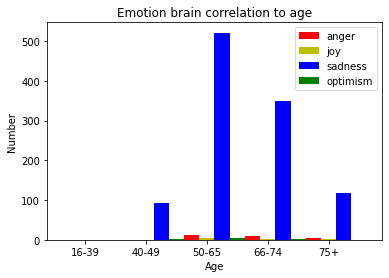

In [ ]:
N = 5
ind = np.arange(N) 
width = 0.25
  
data0 = [brain_corr_age[0,0],
         brain_corr_age[1,0],
         brain_corr_age[2,0],
         brain_corr_age[3,0],
         brain_corr_age[4,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [brain_corr_age[0,1],
         brain_corr_age[1,1], 
         brain_corr_age[2,1],
         brain_corr_age[3,1],
         brain_corr_age[4,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [brain_corr_age[0,2], 
         brain_corr_age[1,2], 
         brain_corr_age[2,2], 
         brain_corr_age[3,2], 
         brain_corr_age[4,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'b')

data3 = [brain_corr_age[0,3], 
         brain_corr_age[1,3], 
         brain_corr_age[2,3], 
         brain_corr_age[3,3], 
         brain_corr_age[4,3]]

bar4 = plt.bar(ind+width*3,data3, width, color = 'g')
  
plt.xlabel("Age")
plt.ylabel('Number')
plt.title("Emotion brain correlation to age")
  
plt.xticks(ind+width,['16-39','40-49','50-65', '66-74','75+'])
plt.legend( (bar1, bar2, bar3, bar4), ('anger', 'joy','sadness', 'optimism') )
plt.show()

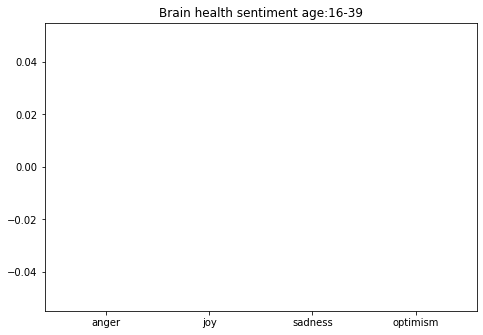

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_age[0,0], brain_corr_age[0,1], brain_corr_age[0,2],brain_corr_age[0,3]]
plt.title('Brain health sentiment age:16-39')
ax.bar(x,y2)
plt.show()

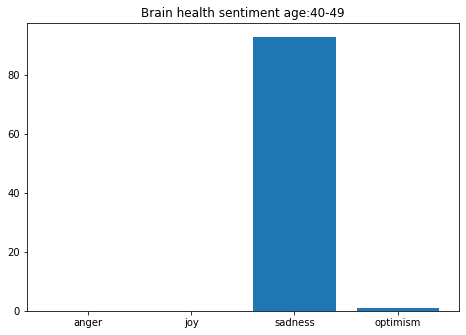

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_age[1,0], brain_corr_age[1,1], brain_corr_age[1,2], brain_corr_age[1,3]]
plt.title('Brain health sentiment age:40-49')
ax.bar(x,y2)
plt.show()

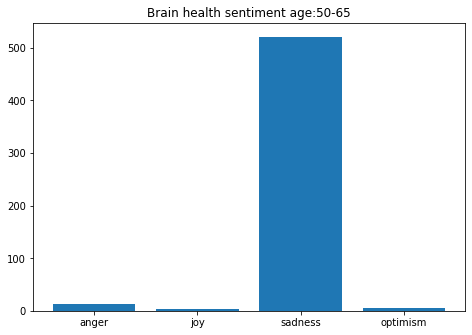

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y3 = [brain_corr_age[2,0], brain_corr_age[2,1], brain_corr_age[2,2],brain_corr_age[2,3]]
plt.title('Brain health sentiment age:50-65')
ax.bar(x,y3)
plt.show()


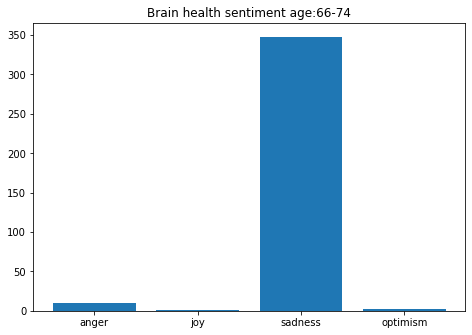

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y4 = [brain_corr_age[3,0], brain_corr_age[3,1], brain_corr_age[3,2], brain_corr_age[3,3]]
plt.title('Brain health sentiment age:66-74')
ax.bar(x,y4)
plt.show()

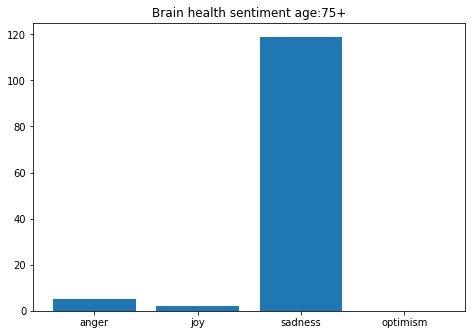

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y5 = [brain_corr_age[4,0], brain_corr_age[4,1], brain_corr_age[4,2],brain_corr_age[4,3]]
plt.title('Brain health sentiment age:75+')
ax.bar(x,y5)
plt.show()


#Brain health correlation to country

In [ ]:
datafile = open('Brain.csv', 'r')
myreader = csv.reader(datafile)
brain_corr_country = np.array([[0,0,0,0],
                              [0,0,0,0],
                              [0,0,0,0],
                              [0,0,0,0],
                              [0,0,0,0]])
for row in myreader:
  if row[5] == '1':
    if row[23] == 'anger':
      brain_corr_country[0,0] = brain_corr_country[0,0]+1
    elif row[23] == 'joy':         
      brain_corr_country[0,1] = brain_corr_country[0,1]+1
    elif row[23] == 'sadness':
      brain_corr_country[0,2] = brain_corr_country[0,2]+1
    else:
      brain_corr_country[0,3] = brain_corr_country[0,3]+1
  if row[5] == '2':
    if row[23] == 'anger':
     brain_corr_country[1,0] = brain_corr_country[1,0]+1
    elif row[23] == 'joy':         
      brain_corr_country[1,1] = brain_corr_country[1,1]+1
    elif row[23] == 'sadness':
      brain_corr_country[1,2] = brain_corr_country[1,2]+1
    else:
      brain_corr_country[1,3] = brain_corr_country[1,3]+1
  if row[5] == '3':
    if row[23] == 'anger':
      brain_corr_country[2,0] = brain_corr_country[2,0]+1
    elif row[23] == 'joy':         
      brain_corr_country[2,1] = brain_corr_country[2,1]+1
    elif row[23] == 'sadness':
      brain_corr_country[2,2] = brain_corr_country[2,2]+1
    else:
      brain_corr_country[2,3] = brain_corr_country[2,3]+1
  if row[5] == '4':
    if row[23] == 'anger':
      brain_corr_country[3,0] = brain_corr_country[3,0]+1
    elif row[23] == 'joy':         
      brain_corr_country[3,1] = brain_corr_country[3,1]+1
    elif row[23] == 'sadness':
      brain_corr_country[3,2] = brain_corr_country[3,2]+1
    else:
      brain_corr_country[3,3] = brain_corr_country[3,3]+1
  if row[5] == '5':
    if row[23] == 'anger':
      brain_corr_country[4,0] = brain_corr_country[4,0]+1
    elif row[23] == 'joy':         
      brain_corr_country[4,1] = brain_corr_country[4,1]+1
    elif row[23] == 'sadness':
      brain_corr_country[4,2] = brain_corr_country[4,2]+1
    else:
      brain_corr_country[4,3] = brain_corr_country[4,3]+1

In [ ]:
print(brain_corr_country)

[[  6   1 115   0]
 [  7   1 242   1]
 [  5   2 135   2]
 [  9   3 572   4]
 [  1   0  17   1]]


##Plot

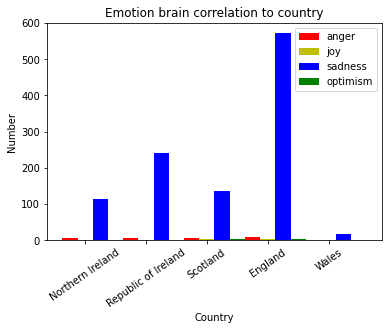

In [ ]:
N = 5
ind = np.arange(N) 
width = 0.25
  
data0 = [brain_corr_country[0,0],
         brain_corr_country[1,0],
         brain_corr_country[2,0],
         brain_corr_country[3,0],
         brain_corr_country[4,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [brain_corr_country[0,1],
         brain_corr_country[1,1], 
         brain_corr_country[2,1],
         brain_corr_country[3,1],
         brain_corr_country[4,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [brain_corr_country[0,2], 
         brain_corr_country[1,2], 
         brain_corr_country[2,2], 
         brain_corr_country[3,2], 
         brain_corr_country[4,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'b')

data3 = [brain_corr_country[0,3], 
         brain_corr_country[1,3], 
         brain_corr_country[2,3], 
         brain_corr_country[3,3], 
         brain_corr_country[4,3]]

bar4 = plt.bar(ind+width*3,data3, width, color = 'g')
  
plt.xlabel("Country")
plt.ylabel('Number')
plt.title("Emotion brain correlation to country")
  
plt.xticks(ind+width,['Northern Ireland','Republic of Ireland','Scotland', 'England','Wales'])
plt.xticks(rotation=35)
plt.legend( (bar1, bar2, bar3, bar4), ('anger', 'joy','sadness', 'optimism') )
plt.show()


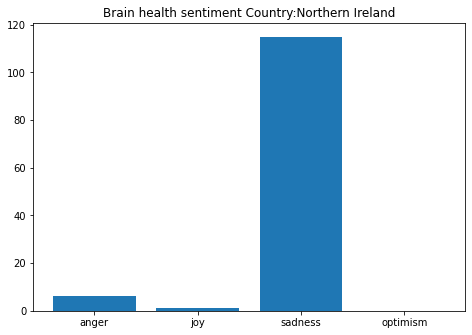

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_country[0,0], brain_corr_country[0,1], brain_corr_country[0,2],brain_corr_country[0,3]]
plt.title('Brain health sentiment Country:Northern Ireland')
ax.bar(x,y2)
plt.show()

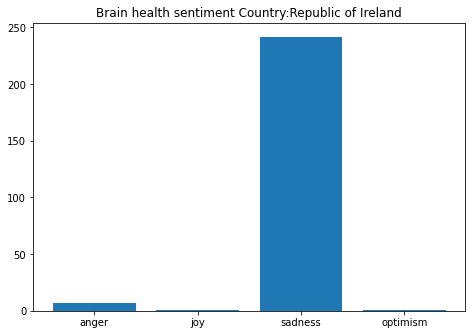

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_country[1,0], brain_corr_country[1,1], brain_corr_country[1,2],brain_corr_country[1,3]]
plt.title('Brain health sentiment Country:Republic of Ireland')
ax.bar(x,y2)
plt.show()

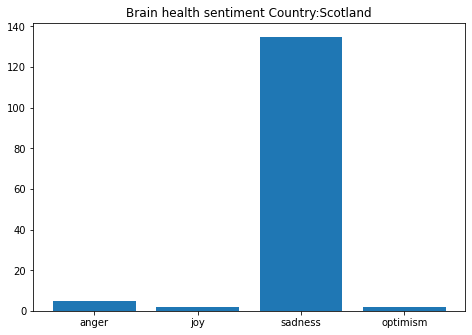

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_country[2,0], brain_corr_country[2,1], brain_corr_country[2,2],brain_corr_country[2,3]]
plt.title('Brain health sentiment Country:Scotland')
ax.bar(x,y2)
plt.show()

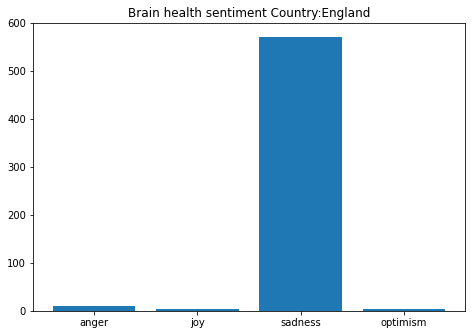

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_country[3,0], brain_corr_country[3,1], brain_corr_country[3,2],brain_corr_country[3,3]]
plt.title('Brain health sentiment Country:England')
ax.bar(x,y2)
plt.show()

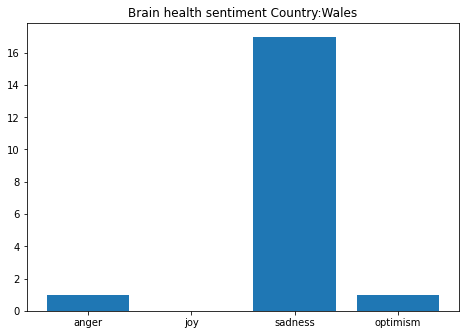

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_country[4,0], brain_corr_country[4,1], brain_corr_country[4,2],brain_corr_country[4,3]]
plt.title('Brain health sentiment Country:Wales')
ax.bar(x,y2)
plt.show()

#Brain health correlation to gender

In [ ]:
datafile = open('Brain.csv', 'r')
myreader = csv.reader(datafile)
brain_corr_gender = np.array([[0,0,0,0],
                              [0,0,0,0],
                              [0,0,0,0],
                              [0,0,0,0],])

for row in myreader:
  if row[6] == '1':
    if row[23] == 'anger':
      brain_corr_gender[0,0] = brain_corr_gender[0,0]+1
    elif row[23] == 'joy':         
      brain_corr_gender[0,1] = brain_corr_gender[0,1]+1
    elif row[23] == 'sadness':
      brain_corr_gender[0,2] = brain_corr_gender[0,2]+1
    else:
      brain_corr_gender[0,3] = brain_corr_gender[0,3]+1
  if row[6] == '2':
    if row[23] == 'anger':
     brain_corr_gender[1,0] = brain_corr_gender[1,0]+1
    elif row[23] == 'joy':         
      brain_corr_gender[1,1] = brain_corr_gender[1,1]+1
    elif row[23] == 'sadness':
      brain_corr_gender[1,2] = brain_corr_gender[1,2]+1
    else:
      brain_corr_gender[1,3] = brain_corr_gender[1,3]+1
  if row[6] == '3':
    if row[23] == 'anger':
      brain_corr_gender[2,0] = brain_corr_gender[2,0]+1
    elif row[23] == 'joy':         
      brain_corr_gender[2,1] = brain_corr_gender[2,1]+1
    elif row[23] == 'sadness':
      brain_corr_gender[2,2] = brain_corr_gender[2,2]+1
    else:
      brain_corr_gender[2,3] = brain_corr_gender[2,3]+1
  if row[6] == '4':
    if row[23] == 'anger':
      brain_corr_gender[3,0] = brain_corr_gender[3,0]+1
    elif row[23] == 'joy':         
      brain_corr_gender[3,1] = brain_corr_gender[3,1]+1
    elif row[23] == 'sadness':
      brain_corr_gender[3,2] = brain_corr_gender[3,2]+1
    else:
      brain_corr_gender[3,3] = brain_corr_gender[3,3]+1
print(brain_corr_gender)

[[  6   0 224   1]
 [ 21   7 848   7]
 [  0   0   0   0]
 [  1   0   1   0]]


##Plot

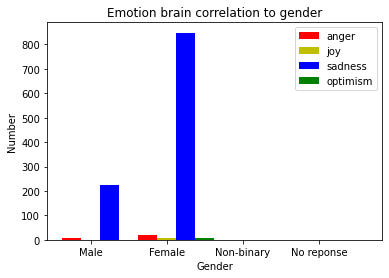

In [ ]:
N = 4
ind = np.arange(N) 
width = 0.25
  
data0 = [brain_corr_gender[0,0],
         brain_corr_gender[1,0],
         brain_corr_gender[2,0],
         brain_corr_gender[3,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [brain_corr_gender[0,1],
         brain_corr_gender[1,1], 
         brain_corr_gender[2,1],
         brain_corr_gender[3,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [brain_corr_gender[0,2], 
         brain_corr_gender[1,2], 
         brain_corr_gender[2,2], 
         brain_corr_gender[3,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'b')

data3 = [brain_corr_gender[0,3], 
         brain_corr_gender[1,3], 
         brain_corr_gender[2,3], 
         brain_corr_gender[3,3]]
bar4 = plt.bar(ind+width*3,data3, width, color = 'g')

plt.xlabel("Gender")
plt.ylabel('Number')
plt.title("Emotion brain correlation to gender")
  
plt.xticks(ind+width,['Male','Female','Non-binary','No reponse'])
plt.legend( (bar1, bar2, bar3,bar4), ('anger', 'joy','sadness', 'optimism') )
plt.show()

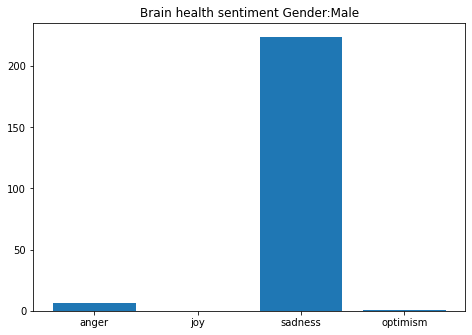

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_gender[0,0], brain_corr_gender[0,1], brain_corr_gender[0,2], brain_corr_gender[0,3]]
plt.title('Brain health sentiment Gender:Male')
ax.bar(x,y2)
plt.show()

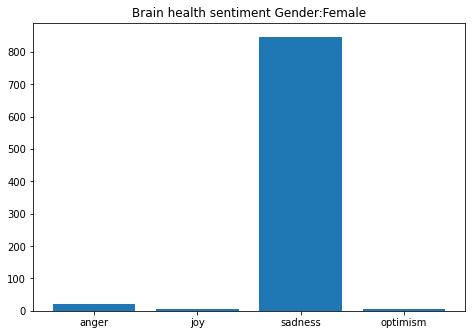

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_gender[1,0], brain_corr_gender[1,1], brain_corr_gender[1,2],brain_corr_gender[1,3]]
plt.title('Brain health sentiment Gender:Female')
ax.bar(x,y2)
plt.show()

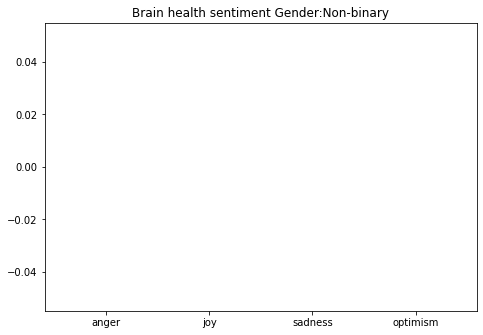

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_gender[2,0], brain_corr_gender[2,1], brain_corr_gender[2,2],brain_corr_gender[2,3]]
plt.title('Brain health sentiment Gender:Non-binary')
ax.bar(x,y2)
plt.show()

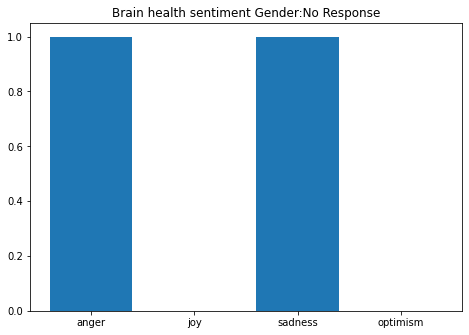

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_gender[3,0], brain_corr_gender[3,1], brain_corr_gender[3,2],brain_corr_gender[3,3]]
plt.title('Brain health sentiment Gender:No Response')
ax.bar(x,y2)
plt.show()

#Brain health correlation to Ethnicity

In [ ]:
datafile = open('Brain.csv', 'r')
myreader = csv.reader(datafile)
brain_corr_ethnicity = np.array([[0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],])
for row in myreader:
  if row[7] == '1':
    if row[23] == 'anger':
      brain_corr_ethnicity[0,0] = brain_corr_ethnicity[0,0]+1
    elif row[23] == 'joy':         
      brain_corr_ethnicity[0,1] = brain_corr_ethnicity[0,1]+1
    elif row[23] == 'sadness':
      brain_corr_ethnicity[0,2] = brain_corr_ethnicity[0,2]+1
    else:
      brain_corr_ethnicity[0,3] = brain_corr_ethnicity[0,3]+1
  if row[7] == '2':
    if row[23] == 'anger':
     brain_corr_ethnicity[1,0] = brain_corr_ethnicity[1,0]+1
    elif row[23] == 'joy':         
      brain_corr_ethnicity[1,1] = brain_corr_ethnicity[1,1]+1
    elif row[23] == 'sadness':
      brain_corr_ethnicity[1,2] = brain_corr_ethnicity[1,2]+1
    else:
      brain_corr_ethnicity[1,3] = brain_corr_ethnicity[1,3]+1
  if row[7] == '3':
    if row[23] == 'anger':
      brain_corr_ethnicity[2,0] = brain_corr_ethnicity[2,0]+1
    elif row[23] == 'joy':         
      brain_corr_ethnicity[2,1] = brain_corr_ethnicity[2,1]+1
    elif row[23] == 'sadness':
      brain_corr_ethnicity[2,2] = brain_corr_ethnicity[2,2]+1
    else:
      brain_corr_ethnicity[2,3] = brain_corr_ethnicity[2,3]+1
  if row[7] == '4':
    if row[23] == 'anger':
      brain_corr_ethnicity[3,0] = brain_corr_ethnicity[3,0]+1
    elif row[23] == 'joy':         
      brain_corr_ethnicity[3,1] = brain_corr_ethnicity[3,1]+1
    elif row[23] == 'sadness':
      brain_corr_ethnicity[3,2] = brain_corr_ethnicity[3,2]+1
    else:
      brain_corr_ethnicity[3,3] = brain_corr_ethnicity[3,3]+1
  if row[7] == '5':
    if row[23] == 'anger':
      brain_corr_ethnicity[4,0] = brain_corr_ethnicity[4,0]+1
    elif row[23] == 'joy':         
      brain_corr_ethnicity[4,1] = brain_corr_ethnicity[4,1]+1
    elif row[23] == 'sadness':
      brain_corr_ethnicity[4,2] = brain_corr_ethnicity[4,2]+1
    else:
      brain_corr_ethnicity[4,3] = brain_corr_ethnicity[4,3]+1
  if row[7] == '6':
    if row[23] == 'anger':
      brain_corr_ethnicity[5,0] = brain_corr_ethnicity[5,0]+1
    elif row[23] == 'joy':         
      brain_corr_ethnicity[5,1] = brain_corr_ethnicity[5,1]+1
    elif row[23] == 'sadness':
      brain_corr_ethnicity[5,2] = brain_corr_ethnicity[5,2]+1
    else:
      brain_corr_ethnicity[5,3] = brain_corr_ethnicity[5,3]+1
  if row[7] == '7':
    if row[23] == 'anger':
      brain_corr_ethnicity[6,0] = brain_corr_ethnicity[6,0]+1
    elif row[23] == 'joy':         
      brain_corr_ethnicity[6,1] = brain_corr_ethnicity[6,1]+1
    elif row[23] == 'sadness':
      brain_corr_ethnicity[6,2] = brain_corr_ethnicity[6,2]+1
    else:
      brain_corr_ethnicity[6,3] = brain_corr_ethnicity[6,3]+1
  if row[7] == '8':
    if row[23] == 'anger':
      brain_corr_ethnicity[7,0] = brain_corr_ethnicity[7,0]+1
    elif row[23] == 'joy':         
      brain_corr_ethnicity[7,1] = brain_corr_ethnicity[7,1]+1
    elif row[23] == 'sadness':
      brain_corr_ethnicity[7,2] = brain_corr_ethnicity[7,2]+1
    else:
      brain_corr_ethnicity[7,3] = brain_corr_ethnicity[7,3]+1
  if row[7] == '9':
    if row[23] == 'anger':
      brain_corr_ethnicity[8,0] = brain_corr_ethnicity[8,0]+1
    elif row[23] == 'joy':         
      brain_corr_ethnicity[8,1] = brain_corr_ethnicity[8,1]+1
    elif row[23] == 'sadness':
      brain_corr_ethnicity[8,2] = brain_corr_ethnicity[8,2]+1
    else:
      brain_corr_ethnicity[8,3] = brain_corr_ethnicity[8,3]+1
  if row[7] == '10':
    if row[23] == 'anger':
      brain_corr_ethnicity[9,0] = brain_corr_ethnicity[9,0]+1
    elif row[23] == 'joy':         
      brain_corr_ethnicity[9,1] = brain_corr_ethnicity[9,1]+1
    elif row[23] == 'sadness':
      brain_corr_ethnicity[9,2] = brain_corr_ethnicity[9,2]+1
    else:
      brain_corr_ethnicity[9,3] = brain_corr_ethnicity[9,3]+1
  if row[7] == '11':
    if row[23] == 'anger':
      brain_corr_ethnicity[10,0] = brain_corr_ethnicity[10,0]+1
    elif row[23] == 'joy':         
      brain_corr_ethnicity[10,1] = brain_corr_ethnicity[10,1]+1
    elif row[23] == 'sadness':
      brain_corr_ethnicity[10,2] = brain_corr_ethnicity[10,2]+1
    else:
      brain_corr_ethnicity[10,3] = brain_corr_ethnicity[10,3]+1


print(brain_corr_ethnicity)

[[  27    7 1053    8]
 [   0    0    1    0]
 [   0    0    0    0]
 [   0    0    2    0]
 [   0    0    0    0]
 [   0    0    0    0]
 [   0    0    0    0]
 [   0    0    0    0]
 [   1    0    5    0]
 [   0    0    8    0]
 [   0    0    4    0]]


##Plot

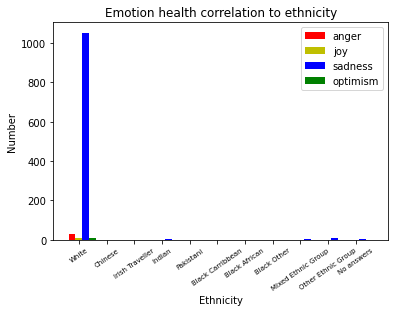

In [ ]:
N = 11
ind = np.arange(N) 
width = 0.25
  
data0 = [brain_corr_ethnicity[0,0],
         brain_corr_ethnicity[1,0],
         brain_corr_ethnicity[2,0],
         brain_corr_ethnicity[3,0],
         brain_corr_ethnicity[4,0],
         brain_corr_ethnicity[5,0],
         brain_corr_ethnicity[6,0],
         brain_corr_ethnicity[7,0],
         brain_corr_ethnicity[8,0],
         brain_corr_ethnicity[9,0],
         brain_corr_ethnicity[10,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [brain_corr_ethnicity[0,1],
         brain_corr_ethnicity[1,1], 
         brain_corr_ethnicity[2,1],
         brain_corr_ethnicity[3,1],
         brain_corr_ethnicity[4,1],
         brain_corr_ethnicity[5,1],
         brain_corr_ethnicity[6,1],
         brain_corr_ethnicity[7,1],
         brain_corr_ethnicity[8,1],
         brain_corr_ethnicity[9,1],
         brain_corr_ethnicity[10,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [brain_corr_ethnicity[0,2], 
         brain_corr_ethnicity[1,2], 
         brain_corr_ethnicity[2,2], 
         brain_corr_ethnicity[3,2], 
         brain_corr_ethnicity[4,2],
         brain_corr_ethnicity[5,2],
         brain_corr_ethnicity[6,2],
         brain_corr_ethnicity[7,2],
         brain_corr_ethnicity[8,2],
         brain_corr_ethnicity[9,2],
         brain_corr_ethnicity[10,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'b')

data3 = [brain_corr_ethnicity[0,3], 
         brain_corr_ethnicity[1,3], 
         brain_corr_ethnicity[2,3], 
         brain_corr_ethnicity[3,3], 
         brain_corr_ethnicity[4,3],
         brain_corr_ethnicity[5,3],
         brain_corr_ethnicity[6,3],
         brain_corr_ethnicity[7,3],
         brain_corr_ethnicity[8,3],
         brain_corr_ethnicity[9,3],
         brain_corr_ethnicity[10,3]]

bar4 = plt.bar(ind+width*3,data3, width, color = 'g')
  
plt.xlabel("Ethnicity")
plt.ylabel('Number')
plt.title("Emotion health correlation to ethnicity")
  
plt.xticks(ind+width,['White','Chinese','Irish Traveller', 'Indian','Pakistani',
                      'Black Carribbean','Black African','Black Other','Mixed Ethnic Group','Other Ethnic Group','No answers' ])
plt.xticks(rotation=35, fontsize =7)
plt.legend( (bar1, bar2, bar3, bar4), ('anger', 'joy','sadness', 'optimism') )
plt.show()

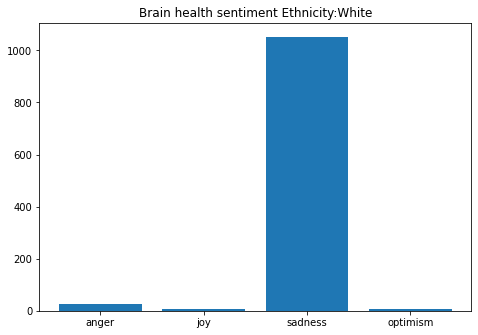

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_ethnicity[0,0], brain_corr_ethnicity[0,1], brain_corr_ethnicity[0,2], brain_corr_ethnicity[0,3]]
plt.title('Brain health sentiment Ethnicity:White')
ax.bar(x,y2)
plt.show()

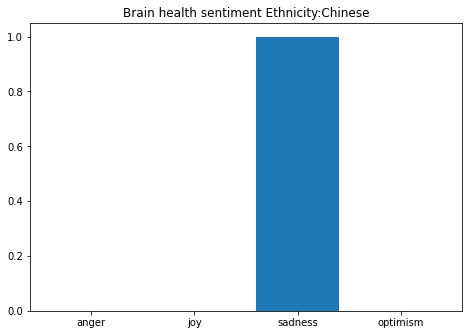

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_ethnicity[1,0], brain_corr_ethnicity[1,1], brain_corr_ethnicity[1,2], brain_corr_ethnicity[1,3]]
plt.title('Brain health sentiment Ethnicity:Chinese')
ax.bar(x,y2)
plt.show()

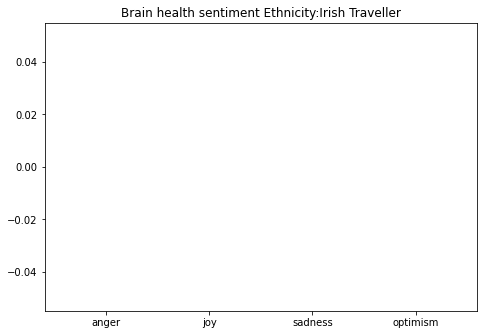

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_ethnicity[2,0], brain_corr_ethnicity[2,1], brain_corr_ethnicity[2,2], brain_corr_ethnicity[2,3]]
plt.title('Brain health sentiment Ethnicity:Irish Traveller')
ax.bar(x,y2)
plt.show()

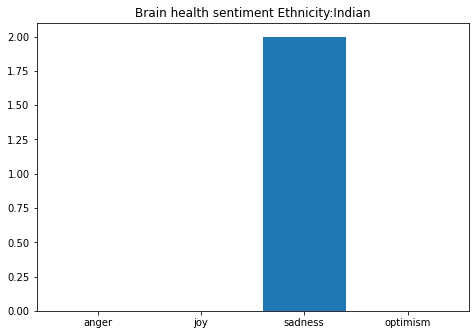

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_ethnicity[3,0], brain_corr_ethnicity[3,1], brain_corr_ethnicity[3,2], brain_corr_ethnicity[3,3]]
plt.title('Brain health sentiment Ethnicity:Indian')
ax.bar(x,y2)
plt.show()

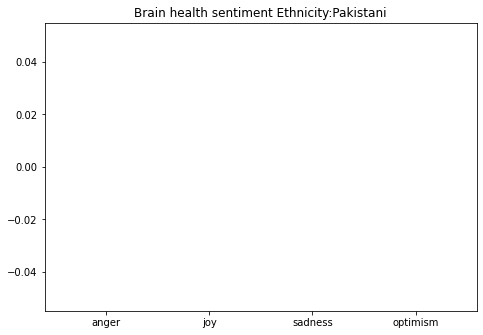

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_ethnicity[4,0], brain_corr_ethnicity[4,1], brain_corr_ethnicity[4,2], brain_corr_ethnicity[4,3]]
plt.title('Brain health sentiment Ethnicity:Pakistani')
ax.bar(x,y2)
plt.show()

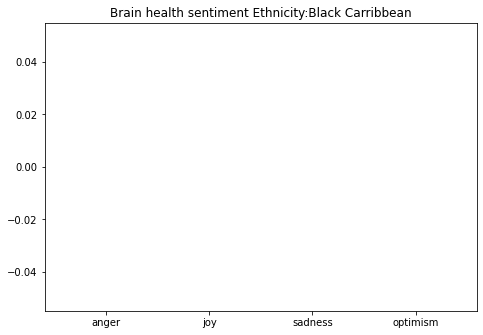

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_ethnicity[5,0], brain_corr_ethnicity[5,1], brain_corr_ethnicity[5,2], brain_corr_ethnicity[5,3]]
plt.title('Brain health sentiment Ethnicity:Black Carribbean')
ax.bar(x,y2)
plt.show()

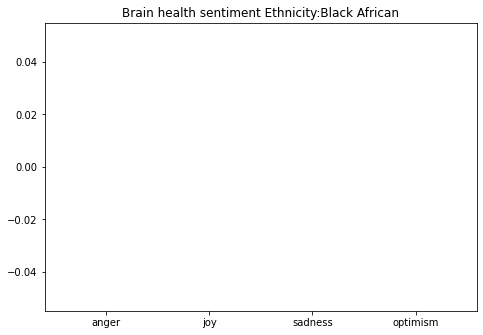

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_ethnicity[6,0], brain_corr_ethnicity[6,1], brain_corr_ethnicity[6,2], brain_corr_ethnicity[6,3]]
plt.title('Brain health sentiment Ethnicity:Black African')
ax.bar(x,y2)
plt.show()

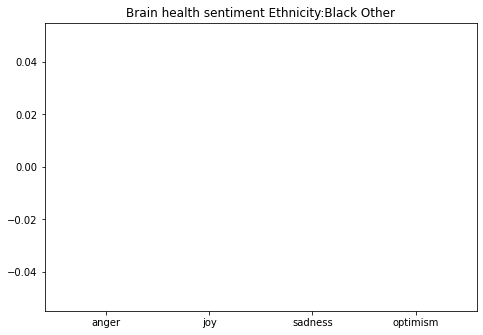

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_ethnicity[7,0], brain_corr_ethnicity[7,1], brain_corr_ethnicity[7,2], brain_corr_ethnicity[7,3]]
plt.title('Brain health sentiment Ethnicity:Black Other')
ax.bar(x,y2)
plt.show()

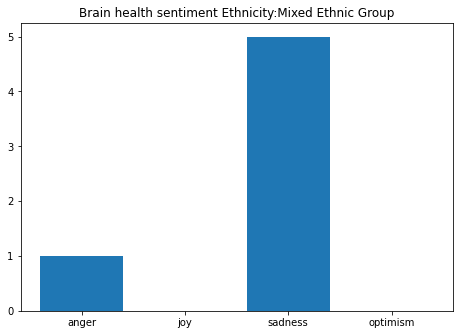

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_ethnicity[8,0], brain_corr_ethnicity[8,1], brain_corr_ethnicity[8,2], brain_corr_ethnicity[8,3]]
plt.title('Brain health sentiment Ethnicity:Mixed Ethnic Group')
ax.bar(x,y2)
plt.show()

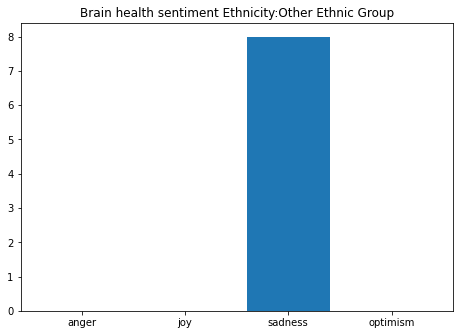

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_ethnicity[9,0], brain_corr_ethnicity[9,1], brain_corr_ethnicity[9,2], brain_corr_ethnicity[9,3]]
plt.title('Brain health sentiment Ethnicity:Other Ethnic Group')
ax.bar(x,y2)
plt.show()

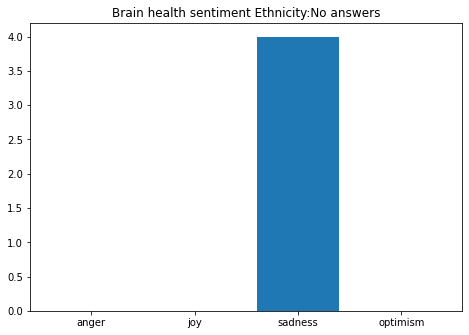

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_ethnicity[10,0], brain_corr_ethnicity[10,1], brain_corr_ethnicity[10,2], brain_corr_ethnicity[10,3]]
plt.title('Brain health sentiment Ethnicity:No answers')
ax.bar(x,y2)
plt.show()

#Brain health correlation to employment

In [ ]:
datafile = open('Brain.csv', 'r')
myreader = csv.reader(datafile)
brain_corr_employment = np.array([[0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0]])
for row in myreader:
  if row[8] == '1':
    if row[23] == 'anger':
      brain_corr_employment[0,0] = brain_corr_employment[0,0]+1
    elif row[23] == 'joy':         
      brain_corr_employment[0,1] = brain_corr_employment[0,1]+1
    elif row[23] == 'sadness':
      brain_corr_employment[0,2] = brain_corr_employment[0,2]+1
    else:
      brain_corr_employment[0,3] = brain_corr_employment[0,3]+1
  if row[8] == '2':
    if row[23] == 'anger':
     brain_corr_employment[1,0] = brain_corr_employment[1,0]+1
    elif row[23] == 'joy':         
      brain_corr_employment[1,1] = brain_corr_employment[1,1]+1
    elif row[23] == 'sadness':
      brain_corr_employment[1,2] = brain_corr_employment[1,2]+1
    else:
      brain_corr_employment[1,3] = brain_corr_employment[1,3]+1
  if row[8] == '3':
    if row[23] == 'anger':
      brain_corr_employment[2,0] = brain_corr_employment[2,0]+1
    elif row[23] == 'joy':         
      brain_corr_employment[2,1] = brain_corr_employment[2,1]+1
    elif row[23] == 'sadness':
      brain_corr_employment[2,2] = brain_corr_employment[2,2]+1
    else:
      brain_corr_employment[2,3] = brain_corr_employment[2,3]+1
  if row[8] == '4':
    if row[23] == 'anger':
      brain_corr_employment[3,0] = brain_corr_employment[3,0]+1
    elif row[23] == 'joy':         
      brain_corr_employment[3,1] = brain_corr_employment[3,1]+1
    elif row[23] == 'sadness':
      brain_corr_employment[3,2] = brain_corr_employment[3,2]+1
    else:
      brain_corr_employment[3,3] = brain_corr_employment[3,3]+1
  if row[8] == '5':
    if row[23] == 'anger':
      brain_corr_employment[4,0] = brain_corr_employment[4,0]+1
    elif row[23] == 'joy':         
      brain_corr_employment[4,1] = brain_corr_employment[4,1]+1
    elif row[23] == 'sadness':
      brain_corr_employment[4,2] = brain_corr_employment[4,2]+1
    else:
      brain_corr_employment[4,3] = brain_corr_employment[4,3]+1
  if row[8] == '6':
    if row[23] == 'anger':
      brain_corr_employment[5,0] = brain_corr_employment[5,0]+1
    elif row[23] == 'joy':         
      brain_corr_employment[5,1] = brain_corr_employment[5,1]+1
    elif row[23] == 'sadness':
      brain_corr_employment[5,2] = brain_corr_employment[5,2]+1
    else:
      brain_corr_employment[5,3] = brain_corr_employment[5,3]+1
  if row[8] == '7':
    if row[23] == 'anger':
      brain_corr_employment[6,0] = brain_corr_employment[6,0]+1
    elif row[23] == 'joy':         
      brain_corr_employment[6,1] = brain_corr_employment[6,1]+1
    elif row[23] == 'sadness':
      brain_corr_employment[6,2] = brain_corr_employment[6,2]+1
    else:
      brain_corr_employment[6,3] = brain_corr_employment[6,3]+1
      
print(brain_corr_employment)

[[  5   1 195   2]
 [  7   2 140   1]
 [  1   0  72   0]
 [  0   0  33   1]
 [ 15   4 576   3]
 [  0   0  51   1]
 [  0   0   6   0]]


##Plot

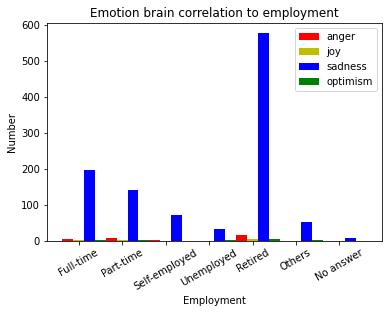

In [ ]:
N = 7
ind = np.arange(N) 
width = 0.25
  
data0 = [brain_corr_employment[0,0],
         brain_corr_employment[1,0],
         brain_corr_employment[2,0],
         brain_corr_employment[3,0],
         brain_corr_employment[4,0],
         brain_corr_employment[5,0],
         brain_corr_employment[6,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [brain_corr_employment[0,1],
         brain_corr_employment[1,1], 
         brain_corr_employment[2,1],
         brain_corr_employment[3,1],
         brain_corr_employment[4,1],
         brain_corr_employment[5,1],
         brain_corr_employment[6,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [brain_corr_employment[0,2], 
         brain_corr_employment[1,2], 
         brain_corr_employment[2,2], 
         brain_corr_employment[3,2],
         brain_corr_employment[4,2],
         brain_corr_employment[5,2],
         brain_corr_employment[6,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'b')

data3 = [brain_corr_employment[0,3], 
         brain_corr_employment[1,3], 
         brain_corr_employment[2,3], 
         brain_corr_employment[3,3],
         brain_corr_employment[4,3],
         brain_corr_employment[5,3],
         brain_corr_employment[6,3]]

bar4 = plt.bar(ind+width*3,data3, width, color = 'g')
  
plt.xlabel("Employment")
plt.ylabel('Number')
plt.title("Emotion brain correlation to employment")
  
plt.xticks(ind+width,['Full-time', 'Part-time','Self-employed','Unemployed','Retired','Others', 'No answer'])
plt.xticks(rotation = 30)
plt.legend( (bar1, bar2, bar3, bar4), ('anger', 'joy','sadness', 'optimism') )
plt.show()

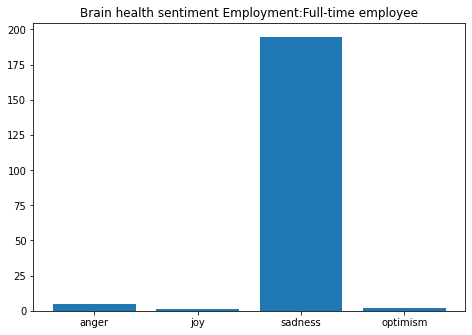

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_employment[0,0], brain_corr_employment[0,1], brain_corr_employment[0,2], brain_corr_employment[0,3]]
plt.title('Brain health sentiment Employment:Full-time employee')
ax.bar(x,y2)
plt.show()

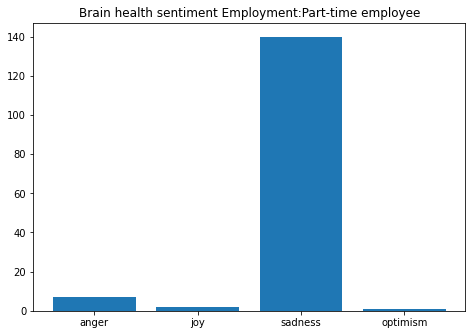

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_employment[1,0], brain_corr_employment[1,1], brain_corr_employment[1,2], brain_corr_employment[1,3]]
plt.title('Brain health sentiment Employment:Part-time employee')
ax.bar(x,y2)
plt.show()

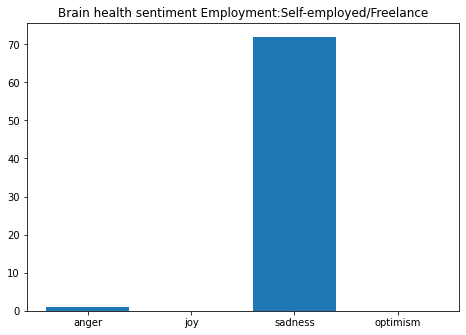

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_employment[2,0], brain_corr_employment[2,1], brain_corr_employment[2,2],brain_corr_employment[2,3]]
plt.title('Brain health sentiment Employment:Self-employed/Freelance')
ax.bar(x,y2)
plt.show()

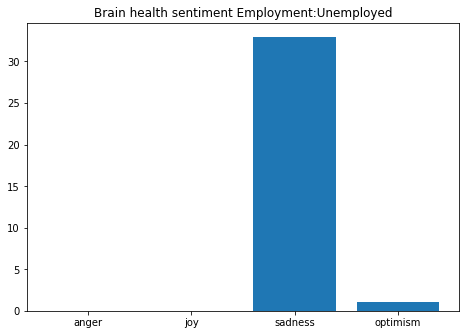

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_employment[3,0], brain_corr_employment[3,1], brain_corr_employment[3,2],brain_corr_employment[3,3]]
plt.title('Brain health sentiment Employment:Unemployed')
ax.bar(x,y2)
plt.show()

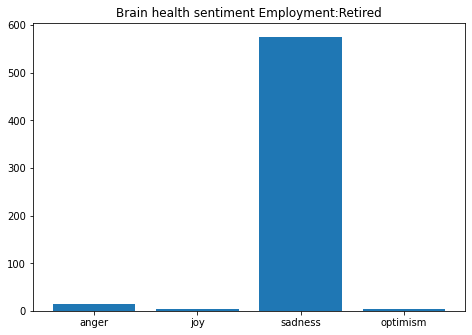

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_employment[4,0], brain_corr_employment[4,1], brain_corr_employment[4,2],brain_corr_employment[4,3]]
plt.title('Brain health sentiment Employment:Retired')
ax.bar(x,y2)
plt.show()

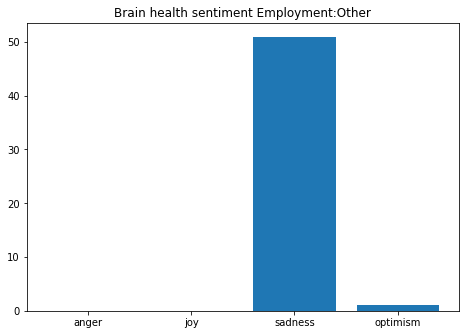

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_employment[5,0], brain_corr_employment[5,1], brain_corr_employment[5,2],brain_corr_employment[5,3]]
plt.title('Brain health sentiment Employment:Other')
ax.bar(x,y2)
plt.show()

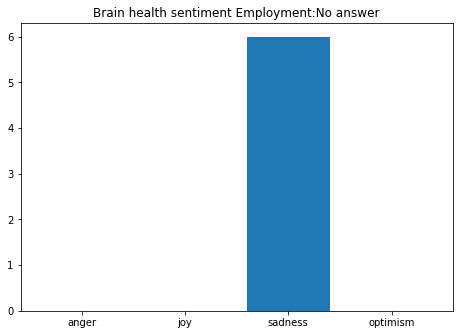

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_employment[6,0], brain_corr_employment[6,1], brain_corr_employment[6,2],brain_corr_employment[6,3]]
plt.title('Brain health sentiment Employment:No answer')
ax.bar(x,y2)
plt.show()

#Brain health correlation to education

In [ ]:
datafile = open('Brain.csv', 'r')
myreader = csv.reader(datafile)
brain_corr_education = np.array([[0,0,0,0],
                                  [0,0,0,0],
                                  [0,0,0,0],
                                  [0,0,0,0],
                                  [0,0,0,0],
                                  [0,0,0,0]])

for row in myreader:
  if row[9] == '1':
    if row[23] == 'anger':
      brain_corr_education[0,0] = brain_corr_education[0,0]+1
    elif row[23] == 'joy':         
      brain_corr_education[0,1] = brain_corr_education[0,1]+1
    elif row[23] == 'sadness':
      brain_corr_education[0,2] = brain_corr_education[0,2]+1
    else:
      brain_corr_education[0,3] = brain_corr_education[0,3]+1
  if row[9] == '2':
    if row[23] == 'anger':
     brain_corr_education[1,0] = brain_corr_education[1,0]+1
    elif row[23] == 'joy':         
      brain_corr_education[1,1] = brain_corr_education[1,1]+1
    elif row[23] == 'sadness':
      brain_corr_education[1,2] = brain_corr_education[1,2]+1
    else:
      brain_corr_education[1,3] = brain_corr_education[1,3]+1
  if row[9] == '3':
    if row[23] == 'anger':
      brain_corr_education[2,0] = brain_corr_education[2,0]+1
    elif row[23] == 'joy':         
      brain_corr_education[2,1] = brain_corr_education[2,1]+1
    elif row[23] == 'sadness':
      brain_corr_education[2,2] = brain_corr_education[2,2]+1
    else:
      brain_corr_education[2,3] = brain_corr_education[2,3]+1
  if row[9] == '4':
    if row[23] == 'anger':
      brain_corr_education[3,0] = brain_corr_education[3,0]+1
    elif row[23] == 'joy':         
      brain_corr_education[3,1] = brain_corr_education[3,1]+1
    elif row[23] == 'sadness':
      brain_corr_education[3,2] = brain_corr_education[3,2]+1
    else:
      brain_corr_education[3,3] = brain_corr_education[3,3]+1
  if row[9] == '5':
    if row[23] == 'anger':
      brain_corr_education[4,0] = brain_corr_education[4,0]+1
    elif row[23] == 'joy':         
      brain_corr_education[4,1] = brain_corr_education[4,1]+1
    elif row[23] == 'sadness':
      brain_corr_education[4,2] = brain_corr_education[4,2]+1
    else:
      brain_corr_education[4,3] = brain_corr_education[4,3]+1
  if row[9] == '6':
    if row[23] == 'anger':
      brain_corr_education[5,0] = brain_corr_education[5,0]+1
    elif row[23] == 'joy':         
      brain_corr_education[5,1] = brain_corr_education[5,1]+1
    elif row[23] == 'sadness':
      brain_corr_education[5,2] = brain_corr_education[5,2]+1
    else:
      brain_corr_education[5,3] = brain_corr_education[5,3]+1


print(brain_corr_education)

[[  2   0  18   0]
 [  5   3 169   1]
 [  4   0 173   1]
 [  9   2 396   4]
 [  8   2 305   2]
 [  0   0  10   0]]


##Plot

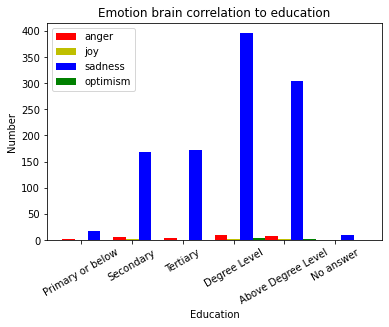

In [ ]:
N = 6
ind = np.arange(N) 
width = 0.25
  
data0 = [brain_corr_education[0,0],
         brain_corr_education[1,0],
         brain_corr_education[2,0],
         brain_corr_education[3,0],
         brain_corr_education[4,0],
         brain_corr_education[5,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [brain_corr_education[0,1],
         brain_corr_education[1,1], 
         brain_corr_education[2,1],
         brain_corr_education[3,1],
         brain_corr_education[4,1],
         brain_corr_education[5,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [brain_corr_education[0,2], 
         brain_corr_education[1,2], 
         brain_corr_education[2,2], 
         brain_corr_education[3,2], 
         brain_corr_education[4,2],
         brain_corr_education[5,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'b')

data3 = [brain_corr_education[0,3], 
         brain_corr_education[1,3], 
         brain_corr_education[2,3], 
         brain_corr_education[3,3], 
         brain_corr_education[4,3],
         brain_corr_education[5,3]]

bar4 = plt.bar(ind+width*3,data3, width, color = 'g')
  
plt.xlabel("Education")
plt.ylabel('Number')
plt.title("Emotion brain correlation to education")
  
plt.xticks(ind+width,['Primary or below','Secondary','Tertiary','Degree Level', 'Above Degree Level','No answer'], rotation=30)
plt.legend( (bar1, bar2, bar3, bar4), ('anger', 'joy','sadness', 'optimism') )
plt.show()

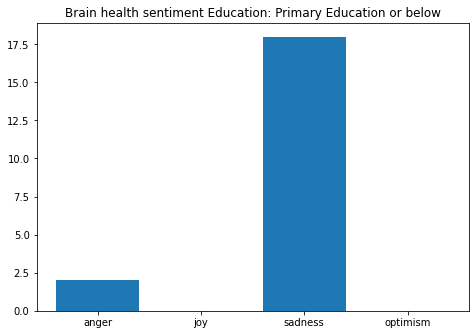

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_education[0,0], brain_corr_education[0,1], brain_corr_education[0,2],brain_corr_education[0,3]]
plt.title('Brain health sentiment Education: Primary Education or below')
ax.bar(x,y2)
plt.show()

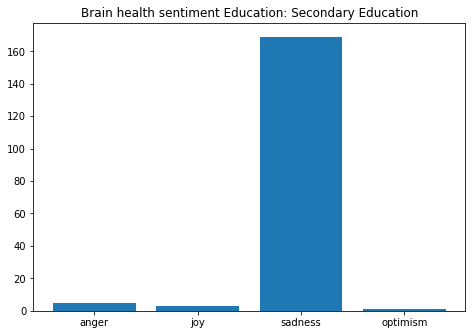

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_education[1,0], brain_corr_education[1,1], brain_corr_education[1,2],brain_corr_education[1,3]]
plt.title('Brain health sentiment Education: Secondary Education')
ax.bar(x,y2)
plt.show()

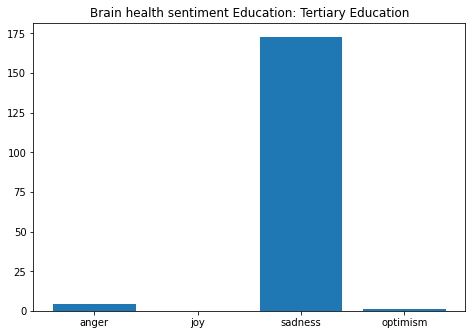

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_education[2,0], brain_corr_education[2,1], brain_corr_education[2,2],brain_corr_education[2,3]]
plt.title('Brain health sentiment Education: Tertiary Education')
ax.bar(x,y2)
plt.show()

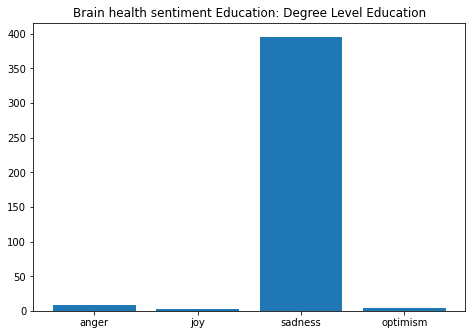

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_education[3,0], brain_corr_education[3,1], brain_corr_education[3,2],brain_corr_education[3,3]]
plt.title('Brain health sentiment Education: Degree Level Education')
ax.bar(x,y2)
plt.show()

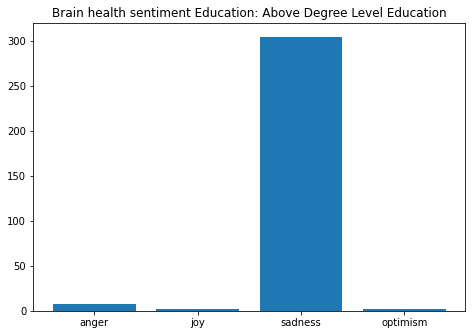

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_education[4,0], brain_corr_education[4,1], brain_corr_education[4,2],brain_corr_education[4,3]]
plt.title('Brain health sentiment Education: Above Degree Level Education')
ax.bar(x,y2)
plt.show()

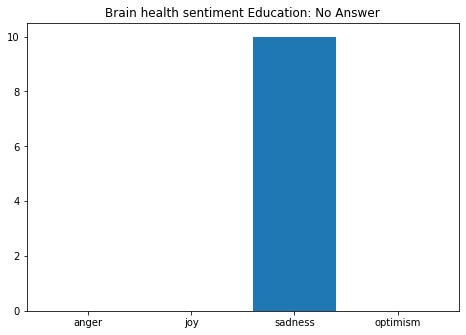

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [brain_corr_education[5,0], brain_corr_education[5,1], brain_corr_education[5,2],brain_corr_education[5,3]]
plt.title('Brain health sentiment Education: No Answer')
ax.bar(x,y2)
plt.show()

#_____________________________________________________

#Dietary Health Sentiment

In [ ]:
#Read file
datafile = open('Dietary full.csv', 'r')
myreader = csv.reader(datafile)
anger=0
joy=0
sadness=0
optimism=0
#Open to write to new file
with open('Brain dietary.csv', 'w') as new_file:
      csv_writer = csv.writer(new_file)
      for row in myreader:     
        print(row[19])

        #Apply tokenizer on response
        encoded_input = tokenizer(row[19], return_tensors='pt')
        output = model(**encoded_input)
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)
        ranking = np.argsort(scores)
        ranking = ranking[::-1]

        #Get highest ranking
        for i in range(scores.shape[0]):
          l = labels[ranking[i]]
          s = scores[ranking[i]]  
          break 

        #Get number of negative/neutral/positive
        if l == 'anger':
          anger = anger+1
        elif l == 'joy':         
          joy = joy+1
        elif l == 'sadness':
          sadness = sadness +1
        else:
          optimism = optimism+1

        #Write responses row to new file and append sentiment to the end of column
        csv_writer.writerow(row+[l]) 

print("Anger:", anger)
print("Joy:", joy)
print("Sadness:", sadness)
print("Optimism:", optimism)


Being at home, less able to converse with friends, anxiety re being out shopping etc,


lack of exercise and more sitting
I am a frontline health care worker. Due to staf shortages due to the pandemic we awere short staffed and worked harder and longer.  One of my colleagues had a brain haemorrhage and her memry impairment is so bad that she can no longer work as a midwife.



Think it has affected me not being able to be close to my children and grandchildren as we are very close to each other. Also not being able to meet and go out with my sisters I have felt quite lonely


L9ng periods away from family, being indoors more, my memory also seems worse. I was feeling depressed.

I had some anxiety attacks as I was classed as At Risk, I look after elderly Dad (who has Dementia) and I also lost a friend to COVID. I sought help when it became really hard to manage.

Felt more depressed snd ‘out of control’ plus I was drinking more alcohol ( not now) lack of contact with others also compo

#Dietary health correlation to age

In [ ]:
datafile = open('Brain dietary.csv', 'r')
myreader = csv.reader(datafile)
dietary_corr_age = np.array([[0,0,0,0],
                            [0,0,0,0],
                            [0,0,0,0],
                            [0,0,0,0],
                            [0,0,0,0]])

for row in myreader:
  if row[4] == '1':
    if row[23] == 'anger':
      dietary_corr_age[0,0] = dietary_corr_age[0,0]+1
    elif row[23] == 'joy':         
      dietary_corr_age[0,1] = dietary_corr_age[0,1]+1
    elif row[23] == 'sadness':
      dietary_corr_age[0,2] = dietary_corr_age[0,2]+1
    else:
      dietary_corr_age[0,3] = dietary_corr_age[0,3]+1
  if row[4] == '2':
    if row[23] == 'anger':
     dietary_corr_age[1,0] = dietary_corr_age[1,0]+1
    elif row[23] == 'joy':         
      dietary_corr_age[1,1] = dietary_corr_age[1,1]+1
    elif row[23] == 'sadness':
      dietary_corr_age[1,2] = dietary_corr_age[1,2]+1
    else:
      dietary_corr_age[1,3] = dietary_corr_age[1,3]+1
  if row[4] == '3':
    if row[23] == 'anger':
      dietary_corr_age[2,0] = dietary_corr_age[2,0]+1
    elif row[23] == 'joy':         
      dietary_corr_age[2,1] = dietary_corr_age[2,1]+1
    elif row[23] == 'sadness':
      dietary_corr_age[2,2] = dietary_corr_age[2,2]+1
    else:
      dietary_corr_age[2,3] = dietary_corr_age[2,3]+1
  if row[4] == '4':
    if row[23] == 'anger':
      dietary_corr_age[3,0] = dietary_corr_age[3,0]+1
    elif row[23] == 'joy':         
      dietary_corr_age[3,1] = dietary_corr_age[3,1]+1
    elif row[23] == 'sadness':
      dietary_corr_age[3,2] = dietary_corr_age[3,2]+1
    else:
      dietary_corr_age[3,3] = dietary_corr_age[3,3]+1
  if row[4] == '5':
    if row[23] == 'anger':
      dietary_corr_age[4,0] = dietary_corr_age[4,0]+1
    elif row[23] == 'joy':         
      dietary_corr_age[4,1] = dietary_corr_age[4,1]+1
    elif row[23] == 'sadness':
      dietary_corr_age[4,2] = dietary_corr_age[4,2]+1
    else:
      dietary_corr_age[4,3] = dietary_corr_age[4,3]+1

print(dietary_corr_age)

[[  0   0   0   0]
 [ 85   0  37   0]
 [355   3 212   1]
 [233   1 143   1]
 [ 91   2  52   0]]


##Plot

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

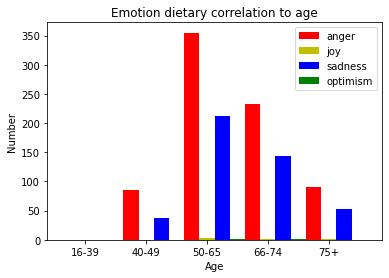

In [ ]:
N = 5
ind = np.arange(N) 
width = 0.25
  
data0 = [dietary_corr_age[0,0],
         dietary_corr_age[1,0],
         dietary_corr_age[2,0],
         dietary_corr_age[3,0],
         dietary_corr_age[4,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [dietary_corr_age[0,1],
         dietary_corr_age[1,1], 
         dietary_corr_age[2,1],
         dietary_corr_age[3,1],
         dietary_corr_age[4,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [dietary_corr_age[0,2], 
         dietary_corr_age[1,2], 
         dietary_corr_age[2,2], 
         dietary_corr_age[3,2], 
         dietary_corr_age[4,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'b')

data3 = [dietary_corr_age[0,3], 
         dietary_corr_age[1,3], 
         dietary_corr_age[2,3], 
         dietary_corr_age[3,3], 
         dietary_corr_age[4,3]]

bar4 = plt.bar(ind+width*3,data3, width, color = 'g')
  
plt.xlabel("Age")
plt.ylabel('Number')
plt.title("Emotion dietary correlation to age")
  
plt.xticks(ind+width,['16-39','40-49','50-65', '66-74','75+'])
plt.legend( (bar1, bar2, bar3, bar4), ('anger', 'joy','sadness', 'optimism') )
plt.show()

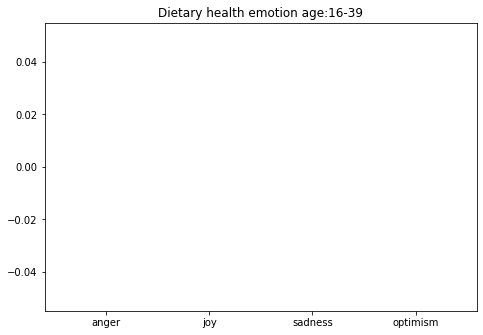

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_age[0,0], dietary_corr_age[0,1], dietary_corr_age[0,2],dietary_corr_age[0,3]]
plt.title('Dietary health emotion age:16-39')
ax.bar(x,y2)
plt.show()

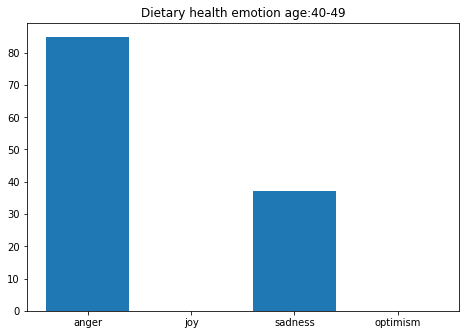

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_age[1,0], dietary_corr_age[1,1], dietary_corr_age[1,2], dietary_corr_age[1,3]]
plt.title('Dietary health emotion age:40-49')
ax.bar(x,y2)
plt.show()

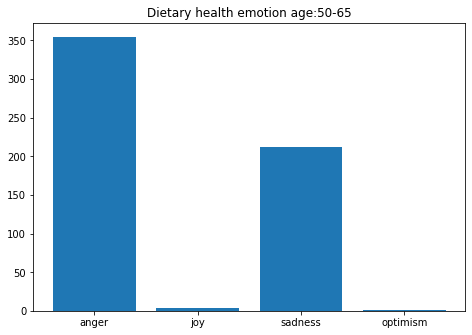

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y3 = [dietary_corr_age[2,0], dietary_corr_age[2,1], dietary_corr_age[2,2],dietary_corr_age[2,3]]
plt.title('Dietary health emotion age:50-65')
ax.bar(x,y3)
plt.show()


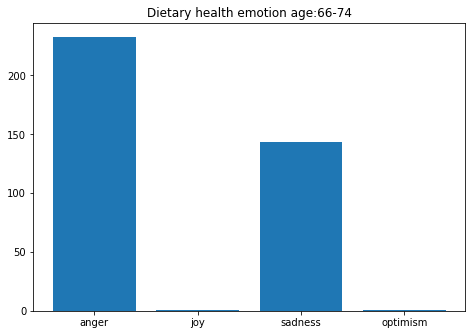

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y4 = [dietary_corr_age[3,0], dietary_corr_age[3,1], dietary_corr_age[3,2], dietary_corr_age[3,3]]
plt.title('Dietary health emotion age:66-74')
ax.bar(x,y4)
plt.show()

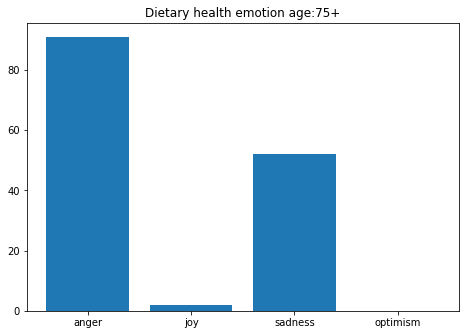

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
y5 = [dietary_corr_age[4,0], dietary_corr_age[4,1], dietary_corr_age[4,2],dietary_corr_age[4,3]]
plt.title('Dietary health emotion age:75+')
ax.bar(x,y5)
plt.show()


#Dietary health correlation to country

In [ ]:
datafile = open('Brain dietary.csv', 'r')
myreader = csv.reader(datafile)
dietary_corr_country = np.array([[0,0,0,0],
                              [0,0,0,0],
                              [0,0,0,0],
                              [0,0,0,0],
                              [0,0,0,0]])
for row in myreader:
  if row[5] == '1':
    if row[23] == 'anger':
      dietary_corr_country[0,0] = dietary_corr_country[0,0]+1
    elif row[23] == 'joy':         
      dietary_corr_country[0,1] = dietary_corr_country[0,1]+1
    elif row[23] == 'sadness':
      dietary_corr_country[0,2] = dietary_corr_country[0,2]+1
    else:
      dietary_corr_country[0,3] = dietary_corr_country[0,3]+1
  if row[5] == '2':
    if row[23] == 'anger':
     dietary_corr_country[1,0] = dietary_corr_country[1,0]+1
    elif row[23] == 'joy':         
      dietary_corr_country[1,1] = dietary_corr_country[1,1]+1
    elif row[23] == 'sadness':
      dietary_corr_country[1,2] = dietary_corr_country[1,2]+1
    else:
      dietary_corr_country[1,3] = dietary_corr_country[1,3]+1
  if row[5] == '3':
    if row[23] == 'anger':
      dietary_corr_country[2,0] = dietary_corr_country[2,0]+1
    elif row[23] == 'joy':         
      dietary_corr_country[2,1] = dietary_corr_country[2,1]+1
    elif row[23] == 'sadness':
      dietary_corr_country[2,2] = dietary_corr_country[2,2]+1
    else:
      dietary_corr_country[2,3] = dietary_corr_country[2,3]+1
  if row[5] == '4':
    if row[23] == 'anger':
      dietary_corr_country[3,0] = dietary_corr_country[3,0]+1
    elif row[23] == 'joy':         
      dietary_corr_country[3,1] = dietary_corr_country[3,1]+1
    elif row[23] == 'sadness':
      dietary_corr_country[3,2] = dietary_corr_country[3,2]+1
    else:
      dietary_corr_country[3,3] = dietary_corr_country[3,3]+1
  if row[5] == '5':
    if row[23] == 'anger':
      dietary_corr_country[4,0] = dietary_corr_country[4,0]+1
    elif row[23] == 'joy':         
      dietary_corr_country[4,1] = dietary_corr_country[4,1]+1
    elif row[23] == 'sadness':
      dietary_corr_country[4,2] = dietary_corr_country[4,2]+1
    else:
      dietary_corr_country[4,3] = dietary_corr_country[4,3]+1

In [ ]:
print(dietary_corr_country)

[[ 95   1  51   0]
 [184   0 103   0]
 [ 97   2  51   1]
 [365   3 232   1]
 [ 23   0   7   0]]


##Plot

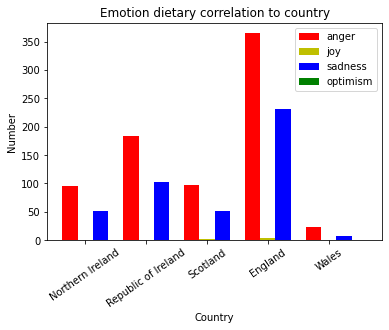

In [ ]:
N = 5
ind = np.arange(N) 
width = 0.25
  
data0 = [dietary_corr_country[0,0],
         dietary_corr_country[1,0],
         dietary_corr_country[2,0],
         dietary_corr_country[3,0],
         dietary_corr_country[4,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [dietary_corr_country[0,1],
         dietary_corr_country[1,1], 
         dietary_corr_country[2,1],
         dietary_corr_country[3,1],
         dietary_corr_country[4,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [dietary_corr_country[0,2], 
         dietary_corr_country[1,2], 
         dietary_corr_country[2,2], 
         dietary_corr_country[3,2], 
         dietary_corr_country[4,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'b')

data3 = [dietary_corr_country[0,3], 
         dietary_corr_country[1,3], 
         dietary_corr_country[2,3], 
         dietary_corr_country[3,3], 
         dietary_corr_country[4,3]]

bar4 = plt.bar(ind+width*3,data3, width, color = 'g')
  
plt.xlabel("Country")
plt.ylabel('Number')
plt.title("Emotion dietary correlation to country")
  
plt.xticks(ind+width,['Northern Ireland','Republic of Ireland','Scotland', 'England','Wales'])
plt.xticks(rotation=35)
plt.legend( (bar1, bar2, bar3, bar4), ('anger', 'joy','sadness', 'optimism') )
plt.show()

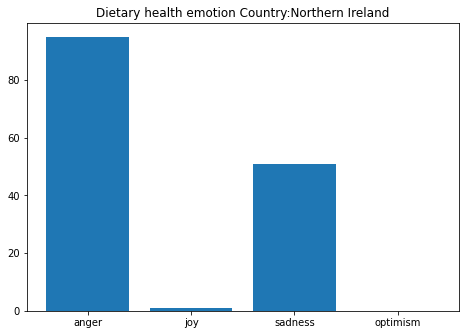

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_country[0,0], dietary_corr_country[0,1], dietary_corr_country[0,2],dietary_corr_country[0,3]]
plt.title('Dietary health emotion Country:Northern Ireland')
ax.bar(x,y2)
plt.show()

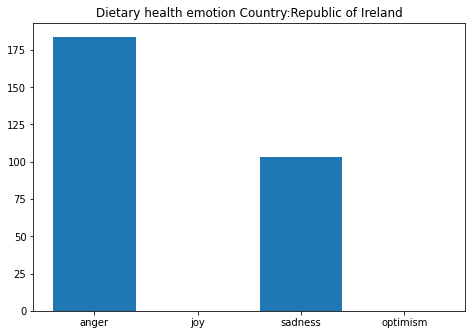

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_country[1,0], dietary_corr_country[1,1], dietary_corr_country[1,2], dietary_corr_country[1,3]]
plt.title('Dietary health emotion Country:Republic of Ireland')
ax.bar(x,y2)
plt.show()

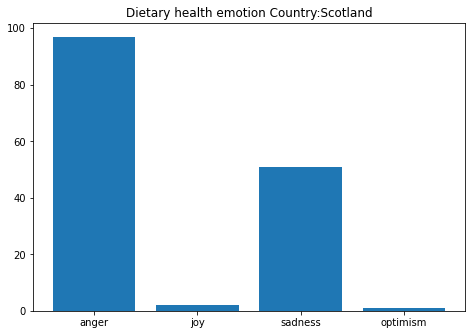

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_country[2,0], dietary_corr_country[2,1], dietary_corr_country[2,2], dietary_corr_country[2,3]]
plt.title('Dietary health emotion Country:Scotland')
ax.bar(x,y2)
plt.show()

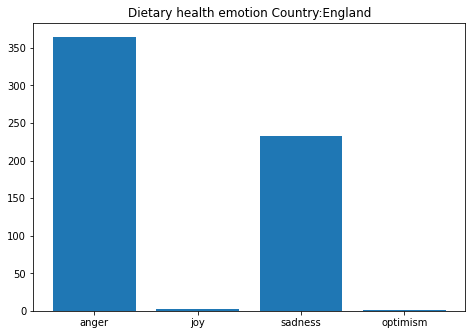

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_country[3,0], dietary_corr_country[3,1], dietary_corr_country[3,2], dietary_corr_country[3,3]]
plt.title('Dietary health emotion Country:England')
ax.bar(x,y2)
plt.show()

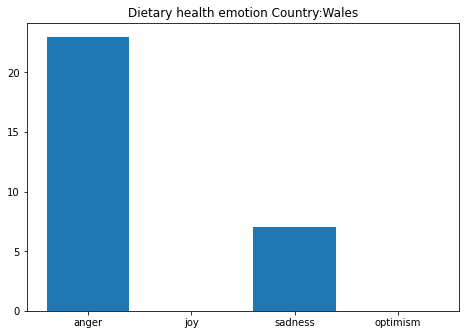

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_country[4,0], dietary_corr_country[4,1], dietary_corr_country[4,2], dietary_corr_country[4,3]]
plt.title('Dietary health emotion Country:Wales')
ax.bar(x,y2)
plt.show()

#Dietary health correlation to gender

In [ ]:
datafile = open('Brain dietary.csv', 'r')
myreader = csv.reader(datafile)
dietary_corr_gender = np.array([[0,0,0,0],
                              [0,0,0,0],
                              [0,0,0,0],
                              [0,0,0,0],])

for row in myreader:
  if row[6] == '1':
    if row[23] == 'anger':
      dietary_corr_gender[0,0] = dietary_corr_gender[0,0]+1
    elif row[23] == 'joy':         
      dietary_corr_gender[0,1] = dietary_corr_gender[0,1]+1
    elif row[23] == 'sadness':
      dietary_corr_gender[0,2] = dietary_corr_gender[0,2]+1
    else:
      dietary_corr_gender[0,3] = dietary_corr_gender[0,3]+1
  if row[6] == '2':
    if row[23] == 'anger':
     dietary_corr_gender[1,0] = dietary_corr_gender[1,0]+1
    elif row[23] == 'joy':         
      dietary_corr_gender[1,1] = dietary_corr_gender[1,1]+1
    elif row[23] == 'sadness':
      dietary_corr_gender[1,2] = dietary_corr_gender[1,2]+1
    else:
      dietary_corr_gender[1,3] = dietary_corr_gender[1,3]+1
  if row[6] == '3':
    if row[23] == 'anger':
      dietary_corr_gender[2,0] = dietary_corr_gender[2,0]+1
    elif row[23] == 'joy':         
      dietary_corr_gender[2,1] = dietary_corr_gender[2,1]+1
    elif row[23] == 'sadness':
      dietary_corr_gender[2,2] = dietary_corr_gender[2,2]+1
    else:
      dietary_corr_gender[2,3] = dietary_corr_gender[2,3]+1
  if row[6] == '4':
    if row[23] == 'anger':
      dietary_corr_gender[3,0] = dietary_corr_gender[3,0]+1
    elif row[23] == 'joy':         
      dietary_corr_gender[3,1] = dietary_corr_gender[3,1]+1
    elif row[23] == 'sadness':
      dietary_corr_gender[3,2] = dietary_corr_gender[3,2]+1
    else:
      dietary_corr_gender[3,3] = dietary_corr_gender[3,3]+1
print(dietary_corr_gender)

[[160   0  87   1]
 [596   6 355   1]
 [  1   0   0   0]
 [  1   0   0   0]]


##Plot

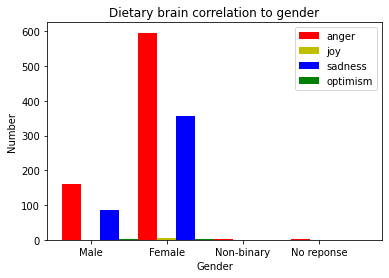

In [ ]:
N = 4
ind = np.arange(N) 
width = 0.25
  
data0 = [dietary_corr_gender[0,0],
         dietary_corr_gender[1,0],
         dietary_corr_gender[2,0],
         dietary_corr_gender[3,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [dietary_corr_gender[0,1],
         dietary_corr_gender[1,1], 
         dietary_corr_gender[2,1],
         dietary_corr_gender[3,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [dietary_corr_gender[0,2], 
         dietary_corr_gender[1,2], 
         dietary_corr_gender[2,2], 
         dietary_corr_gender[3,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'b')

data3 = [dietary_corr_gender[0,3], 
         dietary_corr_gender[1,3], 
         dietary_corr_gender[2,3], 
         dietary_corr_gender[3,3]]
bar4 = plt.bar(ind+width*3,data3, width, color = 'g')

plt.xlabel("Gender")
plt.ylabel('Number')
plt.title("Dietary brain correlation to gender")
  
plt.xticks(ind+width,['Male','Female','Non-binary','No reponse'])
plt.legend( (bar1, bar2, bar3,bar4), ('anger', 'joy','sadness', 'optimism') )
plt.show()

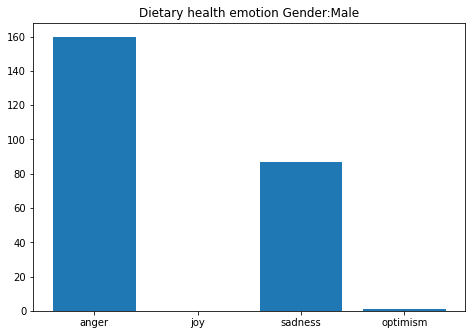

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_gender[0,0], dietary_corr_gender[0,1], dietary_corr_gender[0,2], dietary_corr_gender[0,3]]
plt.title('Dietary health emotion Gender:Male')
ax.bar(x,y2)
plt.show()

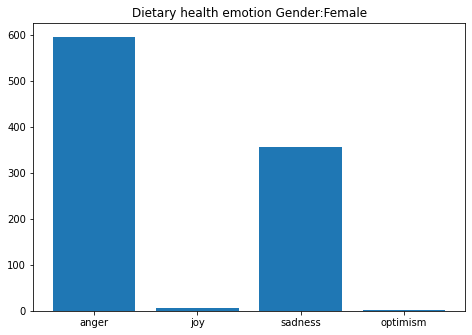

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_gender[1,0], dietary_corr_gender[1,1], dietary_corr_gender[1,2], dietary_corr_gender[1,3]]
plt.title('Dietary health emotion Gender:Female')
ax.bar(x,y2)
plt.show()

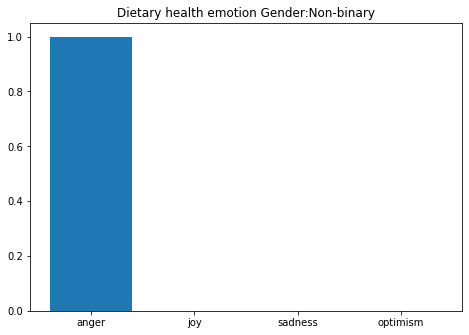

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_gender[2,0], dietary_corr_gender[2,1], dietary_corr_gender[2,2], dietary_corr_gender[2,3]]
plt.title('Dietary health emotion Gender:Non-binary')
ax.bar(x,y2)
plt.show()

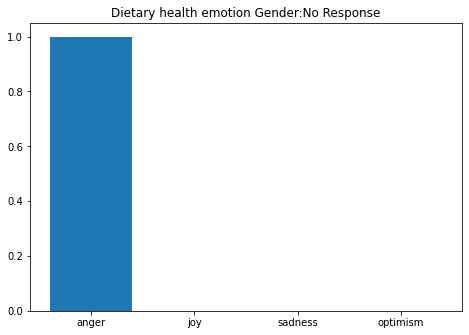

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_gender[3,0], dietary_corr_gender[3,1], dietary_corr_gender[3,2], dietary_corr_gender[3,3]]
plt.title('Dietary health emotion Gender:No Response')
ax.bar(x,y2)
plt.show()

#Dietary health correlation to Ethnicity

In [ ]:
datafile = open('Brain dietary.csv', 'r')
myreader = csv.reader(datafile)
dietary_corr_ethnicity = np.array([[0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],])
for row in myreader:
  if row[7] == '1':
    if row[23] == 'anger':
      dietary_corr_ethnicity[0,0] = dietary_corr_ethnicity[0,0]+1
    elif row[23] == 'joy':         
      dietary_corr_ethnicity[0,1] = dietary_corr_ethnicity[0,1]+1
    elif row[23] == 'sadness':
      dietary_corr_ethnicity[0,2] = dietary_corr_ethnicity[0,2]+1
    else:
      dietary_corr_ethnicity[0,3] = dietary_corr_ethnicity[0,3]+1
  if row[7] == '2':
    if row[23] == 'anger':
     dietary_corr_ethnicity[1,0] = dietary_corr_ethnicity[1,0]+1
    elif row[23] == 'joy':         
      dietary_corr_ethnicity[1,1] = dietary_corr_ethnicity[1,1]+1
    elif row[23] == 'sadness':
      dietary_corr_ethnicity[1,2] = dietary_corr_ethnicity[1,2]+1
    else:
      dietary_corr_ethnicity[1,3] = dietary_corr_ethnicity[1,3]+1
  if row[7] == '3':
    if row[23] == 'anger':
      dietary_corr_ethnicity[2,0] = dietary_corr_ethnicity[2,0]+1
    elif row[23] == 'joy':         
      dietary_corr_ethnicity[2,1] = dietary_corr_ethnicity[2,1]+1
    elif row[23] == 'sadness':
      dietary_corr_ethnicity[2,2] = dietary_corr_ethnicity[2,2]+1
    else:
      dietary_corr_ethnicity[2,3] = dietary_corr_ethnicity[2,3]+1
  if row[7] == '4':
    if row[23] == 'anger':
      dietary_corr_ethnicity[3,0] = dietary_corr_ethnicity[3,0]+1
    elif row[23] == 'joy':         
      dietary_corr_ethnicity[3,1] = dietary_corr_ethnicity[3,1]+1
    elif row[23] == 'sadness':
      dietary_corr_ethnicity[3,2] = dietary_corr_ethnicity[3,2]+1
    else:
      dietary_corr_ethnicity[3,3] = dietary_corr_ethnicity[3,3]+1
  if row[7] == '5':
    if row[23] == 'anger':
      dietary_corr_ethnicity[4,0] = dietary_corr_ethnicity[4,0]+1
    elif row[23] == 'joy':         
      dietary_corr_ethnicity[4,1] = dietary_corr_ethnicity[4,1]+1
    elif row[23] == 'sadness':
      dietary_corr_ethnicity[4,2] = dietary_corr_ethnicity[4,2]+1
    else:
      dietary_corr_ethnicity[4,3] = dietary_corr_ethnicity[4,3]+1
  if row[7] == '6':
    if row[23] == 'anger':
      dietary_corr_ethnicity[5,0] = dietary_corr_ethnicity[5,0]+1
    elif row[23] == 'joy':         
      dietary_corr_ethnicity[5,1] = dietary_corr_ethnicity[5,1]+1
    elif row[23] == 'sadness':
      dietary_corr_ethnicity[5,2] = dietary_corr_ethnicity[5,2]+1
    else:
      dietary_corr_ethnicity[5,3] = dietary_corr_ethnicity[5,3]+1
  if row[7] == '7':
    if row[23] == 'anger':
      dietary_corr_ethnicity[6,0] = dietary_corr_ethnicity[6,0]+1
    elif row[23] == 'joy':         
      dietary_corr_ethnicity[6,1] = dietary_corr_ethnicity[6,1]+1
    elif row[23] == 'sadness':
      dietary_corr_ethnicity[6,2] = dietary_corr_ethnicity[6,2]+1
    else:
      dietary_corr_ethnicity[6,3] = dietary_corr_ethnicity[6,3]+1
  if row[7] == '8':
    if row[23] == 'anger':
      dietary_corr_ethnicity[7,0] = dietary_corr_ethnicity[7,0]+1
    elif row[23] == 'joy':         
      dietary_corr_ethnicity[7,1] = dietary_corr_ethnicity[7,1]+1
    elif row[23] == 'sadness':
      dietary_corr_ethnicity[7,2] = dietary_corr_ethnicity[7,2]+1
    else:
      dietary_corr_ethnicity[7,3] = dietary_corr_ethnicity[7,3]+1
  if row[7] == '9':
    if row[23] == 'anger':
      dietary_corr_ethnicity[8,0] = dietary_corr_ethnicity[8,0]+1
    elif row[23] == 'joy':         
      dietary_corr_ethnicity[8,1] = dietary_corr_ethnicity[8,1]+1
    elif row[23] == 'sadness':
      dietary_corr_ethnicity[8,2] = dietary_corr_ethnicity[8,2]+1
    else:
      dietary_corr_ethnicity[8,3] = dietary_corr_ethnicity[8,3]+1
  if row[7] == '10':
    if row[23] == 'anger':
      dietary_corr_ethnicity[9,0] = dietary_corr_ethnicity[9,0]+1
    elif row[23] == 'joy':         
      dietary_corr_ethnicity[9,1] = dietary_corr_ethnicity[9,1]+1
    elif row[23] == 'sadness':
      dietary_corr_ethnicity[9,2] = dietary_corr_ethnicity[9,2]+1
    else:
      dietary_corr_ethnicity[9,3] = dietary_corr_ethnicity[9,3]+1
  if row[7] == '11':
    if row[23] == 'anger':
      dietary_corr_ethnicity[10,0] = dietary_corr_ethnicity[10,0]+1
    elif row[23] == 'joy':         
      dietary_corr_ethnicity[10,1] = dietary_corr_ethnicity[10,1]+1
    elif row[23] == 'sadness':
      dietary_corr_ethnicity[10,2] = dietary_corr_ethnicity[10,2]+1
    else:
      dietary_corr_ethnicity[10,3] = dietary_corr_ethnicity[10,3]+1


print(dietary_corr_ethnicity)

[[747   6 432   2]
 [  1   0   1   0]
 [  0   0   0   0]
 [  2   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  0   0   0   0]
 [  3   0   2   0]
 [  5   0   4   0]
 [  0   0   3   0]]


##Plot

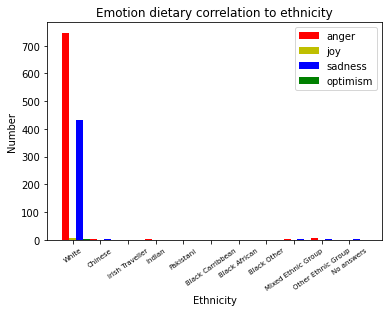

In [ ]:
N = 11
ind = np.arange(N) 
width = 0.25
  
data0 = [dietary_corr_ethnicity[0,0],
         dietary_corr_ethnicity[1,0],
         dietary_corr_ethnicity[2,0],
         dietary_corr_ethnicity[3,0],
         dietary_corr_ethnicity[4,0],
         dietary_corr_ethnicity[5,0],
         dietary_corr_ethnicity[6,0],
         dietary_corr_ethnicity[7,0],
         dietary_corr_ethnicity[8,0],
         dietary_corr_ethnicity[9,0],
         dietary_corr_ethnicity[10,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [dietary_corr_ethnicity[0,1],
         dietary_corr_ethnicity[1,1], 
         dietary_corr_ethnicity[2,1],
         dietary_corr_ethnicity[3,1],
         dietary_corr_ethnicity[4,1],
         dietary_corr_ethnicity[5,1],
         dietary_corr_ethnicity[6,1],
         dietary_corr_ethnicity[7,1],
         dietary_corr_ethnicity[8,1],
         dietary_corr_ethnicity[9,1],
         dietary_corr_ethnicity[10,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [dietary_corr_ethnicity[0,2], 
         dietary_corr_ethnicity[1,2], 
         dietary_corr_ethnicity[2,2], 
         dietary_corr_ethnicity[3,2], 
         dietary_corr_ethnicity[4,2],
         dietary_corr_ethnicity[5,2],
         dietary_corr_ethnicity[6,2],
         dietary_corr_ethnicity[7,2],
         dietary_corr_ethnicity[8,2],
         dietary_corr_ethnicity[9,2],
         dietary_corr_ethnicity[10,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'b')

data3 = [dietary_corr_ethnicity[0,3], 
         dietary_corr_ethnicity[1,3], 
         dietary_corr_ethnicity[2,3], 
         dietary_corr_ethnicity[3,3], 
         dietary_corr_ethnicity[4,3],
         dietary_corr_ethnicity[5,3],
         dietary_corr_ethnicity[6,3],
         dietary_corr_ethnicity[7,3],
         dietary_corr_ethnicity[8,3],
         dietary_corr_ethnicity[9,3],
         dietary_corr_ethnicity[10,3]]

bar4 = plt.bar(ind+width*3,data3, width, color = 'g')
  
plt.xlabel("Ethnicity")
plt.ylabel('Number')
plt.title("Emotion dietary correlation to ethnicity")
  
plt.xticks(ind+width,['White','Chinese','Irish Traveller', 'Indian','Pakistani',
                      'Black Carribbean','Black African','Black Other','Mixed Ethnic Group','Other Ethnic Group','No answers' ])
plt.xticks(rotation=35, fontsize =7)
plt.legend( (bar1, bar2, bar3, bar4), ('anger', 'joy','sadness', 'optimism') )
plt.show()

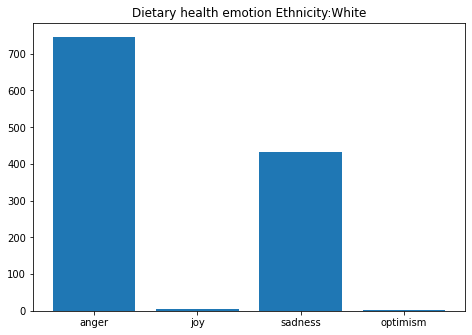

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_ethnicity[0,0], dietary_corr_ethnicity[0,1], dietary_corr_ethnicity[0,2], dietary_corr_ethnicity[0,3]]
plt.title('Dietary health emotion Ethnicity:White')
ax.bar(x,y2)
plt.show()

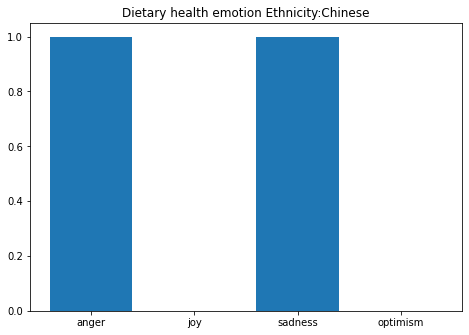

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_ethnicity[1,0], dietary_corr_ethnicity[1,1], dietary_corr_ethnicity[1,2], dietary_corr_ethnicity[1,3]]
plt.title('Dietary health emotion Ethnicity:Chinese')
ax.bar(x,y2)
plt.show()

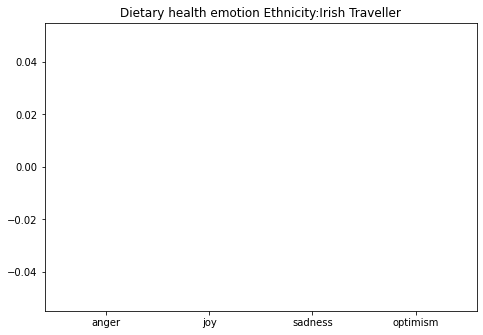

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_ethnicity[2,0], dietary_corr_ethnicity[2,1], dietary_corr_ethnicity[2,2], dietary_corr_ethnicity[2,3]]
plt.title('Dietary health emotion Ethnicity:Irish Traveller')
ax.bar(x,y2)
plt.show()

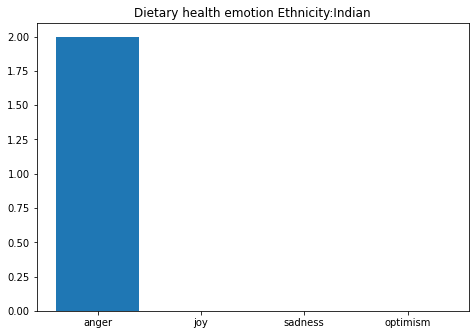

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_ethnicity[3,0], dietary_corr_ethnicity[3,1], dietary_corr_ethnicity[3,2], dietary_corr_ethnicity[3,3]]
plt.title('Dietary health emotion Ethnicity:Indian')
ax.bar(x,y2)
plt.show()

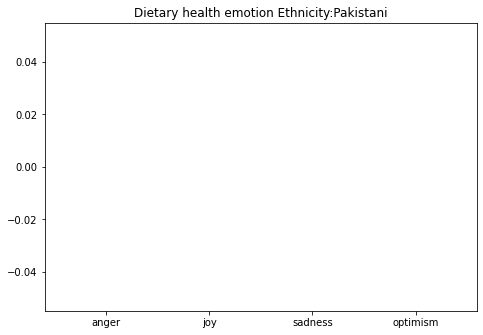

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_ethnicity[4,0], dietary_corr_ethnicity[4,1], dietary_corr_ethnicity[4,2], dietary_corr_ethnicity[4,3]]
plt.title('Dietary health emotion Ethnicity:Pakistani')
ax.bar(x,y2)
plt.show()

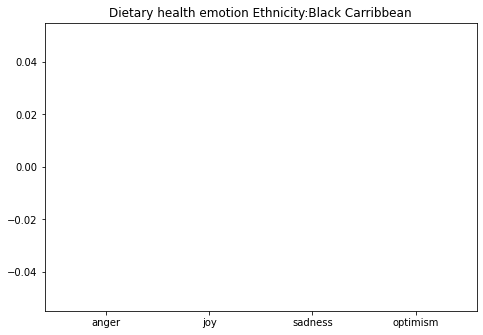

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_ethnicity[5,0],dietary_corr_ethnicity[5,1], dietary_corr_ethnicity[5,2], dietary_corr_ethnicity[5,3]]
plt.title('Dietary health emotion Ethnicity:Black Carribbean')
ax.bar(x,y2)
plt.show()

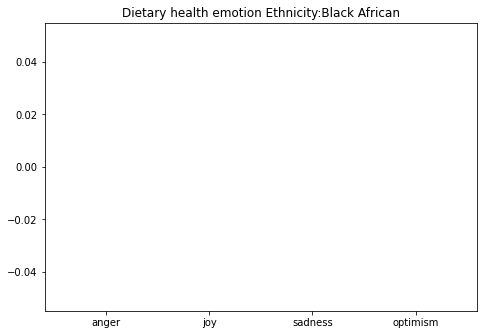

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_ethnicity[6,0], dietary_corr_ethnicity[6,1], dietary_corr_ethnicity[6,2], dietary_corr_ethnicity[6,3]]
plt.title('Dietary health emotion Ethnicity:Black African')
ax.bar(x,y2)
plt.show()

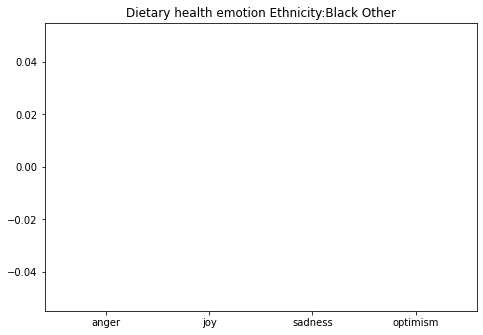

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_ethnicity[7,0], dietary_corr_ethnicity[7,1], dietary_corr_ethnicity[7,2], dietary_corr_ethnicity[7,3]]
plt.title('Dietary health emotion Ethnicity:Black Other')
ax.bar(x,y2)
plt.show()

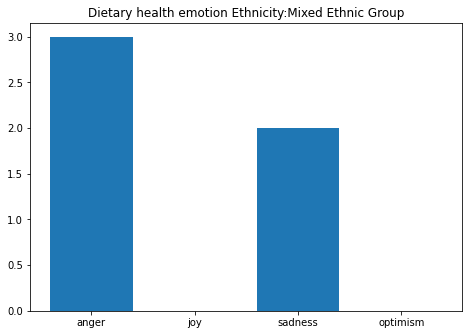

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_ethnicity[8,0], dietary_corr_ethnicity[8,1], dietary_corr_ethnicity[8,2], dietary_corr_ethnicity[8,3]]
plt.title('Dietary health emotion Ethnicity:Mixed Ethnic Group')
ax.bar(x,y2)
plt.show()

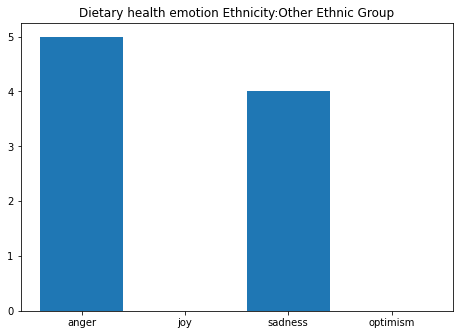

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_ethnicity[9,0], dietary_corr_ethnicity[9,1], dietary_corr_ethnicity[9,2], dietary_corr_ethnicity[9,3]]
plt.title('Dietary health emotion Ethnicity:Other Ethnic Group')
ax.bar(x,y2)
plt.show()

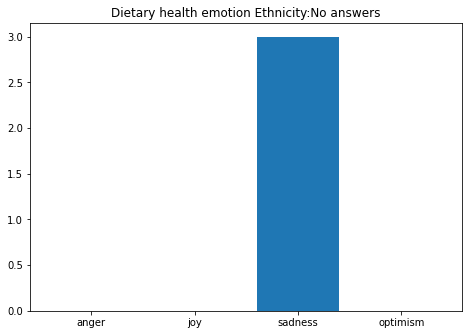

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_ethnicity[10,0], dietary_corr_ethnicity[10,1], dietary_corr_ethnicity[10,2], dietary_corr_ethnicity[10,3]]
plt.title('Dietary health emotion Ethnicity:No answers')
ax.bar(x,y2)
plt.show()

#Dietary health correlation to employment

In [ ]:
datafile = open('Brain dietary.csv', 'r')
myreader = csv.reader(datafile)
dietary_corr_employment = np.array([[0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0],
                                [0,0,0,0]])
for row in myreader:
  if row[8] == '1':
    if row[23] == 'anger':
      dietary_corr_employment[0,0] = dietary_corr_employment[0,0]+1
    elif row[23] == 'joy':         
      dietary_corr_employment[0,1] = dietary_corr_employment[0,1]+1
    elif row[23] == 'sadness':
      dietary_corr_employment[0,2] = dietary_corr_employment[0,2]+1
    else:
      dietary_corr_employment[0,3] = dietary_corr_employment[0,3]+1
  if row[8] == '2':
    if row[23] == 'anger':
     dietary_corr_employment[1,0] = dietary_corr_employment[1,0]+1
    elif row[23] == 'joy':         
      dietary_corr_employment[1,1] = dietary_corr_employment[1,1]+1
    elif row[23] == 'sadness':
      dietary_corr_employment[1,2] = dietary_corr_employment[1,2]+1
    else:
      dietary_corr_employment[1,3] = dietary_corr_employment[1,3]+1
  if row[8] == '3':
    if row[23] == 'anger':
      dietary_corr_employment[2,0] = dietary_corr_employment[2,0]+1
    elif row[23] == 'joy':         
      dietary_corr_employment[2,1] = dietary_corr_employment[2,1]+1
    elif row[23] == 'sadness':
      dietary_corr_employment[2,2] = dietary_corr_employment[2,2]+1
    else:
      dietary_corr_employment[2,3] = dietary_corr_employment[2,3]+1
  if row[8] == '4':
    if row[23] == 'anger':
      dietary_corr_employment[3,0] = dietary_corr_employment[3,0]+1
    elif row[23] == 'joy':         
      dietary_corr_employment[3,1] = dietary_corr_employment[3,1]+1
    elif row[23] == 'sadness':
      dietary_corr_employment[3,2] = dietary_corr_employment[3,2]+1
    else:
      dietary_corr_employment[3,3] = dietary_corr_employment[3,3]+1
  if row[8] == '5':
    if row[23] == 'anger':
      dietary_corr_employment[4,0] = dietary_corr_employment[4,0]+1
    elif row[23] == 'joy':         
      dietary_corr_employment[4,1] = dietary_corr_employment[4,1]+1
    elif row[23] == 'sadness':
      dietary_corr_employment[4,2] = dietary_corr_employment[4,2]+1
    else:
      dietary_corr_employment[4,3] = dietary_corr_employment[4,3]+1
  if row[8] == '6':
    if row[23] == 'anger':
      dietary_corr_employment[5,0] = dietary_corr_employment[5,0]+1
    elif row[23] == 'joy':         
      dietary_corr_employment[5,1] = dietary_corr_employment[5,1]+1
    elif row[23] == 'sadness':
      dietary_corr_employment[5,2] = dietary_corr_employment[5,2]+1
    else:
      dietary_corr_employment[5,3] = dietary_corr_employment[5,3]+1
  if row[8] == '7':
    if row[23] == 'anger':
      dietary_corr_employment[6,0] = dietary_corr_employment[6,0]+1
    elif row[23] == 'joy':         
      dietary_corr_employment[6,1] = dietary_corr_employment[6,1]+1
    elif row[23] == 'sadness':
      dietary_corr_employment[6,2] = dietary_corr_employment[6,2]+1
    else:
      dietary_corr_employment[6,3] = dietary_corr_employment[6,3]+1
      
print(dietary_corr_employment)

[[165   0  76   0]
 [109   2  56   0]
 [ 50   0  31   0]
 [ 20   0  15   0]
 [375   4 237   1]
 [ 31   0  24   1]
 [  6   0   3   0]]


##Plot

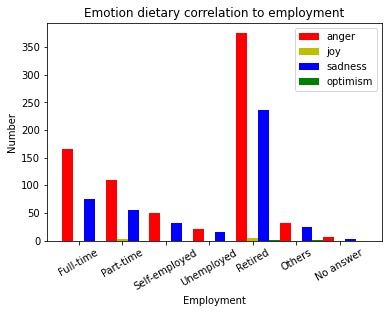

In [ ]:
N = 7
ind = np.arange(N) 
width = 0.25
  
data0 = [dietary_corr_employment[0,0],
         dietary_corr_employment[1,0],
         dietary_corr_employment[2,0],
         dietary_corr_employment[3,0],
         dietary_corr_employment[4,0],
         dietary_corr_employment[5,0],
         dietary_corr_employment[6,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [dietary_corr_employment[0,1],
         dietary_corr_employment[1,1], 
         dietary_corr_employment[2,1],
         dietary_corr_employment[3,1],
         dietary_corr_employment[4,1],
         dietary_corr_employment[5,1],
         dietary_corr_employment[6,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [dietary_corr_employment[0,2], 
         dietary_corr_employment[1,2], 
         dietary_corr_employment[2,2], 
         dietary_corr_employment[3,2],
         dietary_corr_employment[4,2],
         dietary_corr_employment[5,2],
         dietary_corr_employment[6,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'b')

data3 = [dietary_corr_employment[0,3], 
         dietary_corr_employment[1,3], 
         dietary_corr_employment[2,3], 
         dietary_corr_employment[3,3],
         dietary_corr_employment[4,3],
         dietary_corr_employment[5,3],
         dietary_corr_employment[6,3]]

bar4 = plt.bar(ind+width*3,data3, width, color = 'g')
  
plt.xlabel("Employment")
plt.ylabel('Number')
plt.title("Emotion dietary correlation to employment")
  
plt.xticks(ind+width,['Full-time', 'Part-time','Self-employed','Unemployed','Retired','Others', 'No answer'])
plt.xticks(rotation = 30)
plt.legend( (bar1, bar2, bar3, bar4), ('anger', 'joy','sadness', 'optimism') )
plt.show()

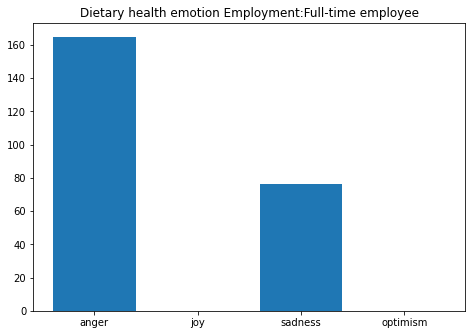

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_employment[0,0], dietary_corr_employment[0,1], dietary_corr_employment[0,2], dietary_corr_employment[0,3]]
plt.title('Dietary health emotion Employment:Full-time employee')
ax.bar(x,y2)
plt.show()

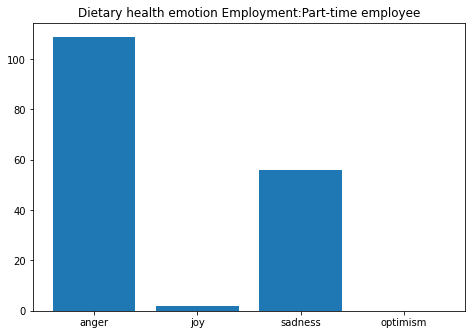

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_employment[1,0], dietary_corr_employment[1,1], dietary_corr_employment[1,2], dietary_corr_employment[1,3]]
plt.title('Dietary health emotion Employment:Part-time employee')
ax.bar(x,y2)
plt.show()

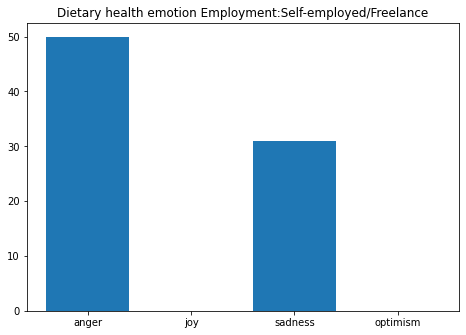

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_employment[2,0], dietary_corr_employment[2,1], dietary_corr_employment[2,2], dietary_corr_employment[2,3]]
plt.title('Dietary health emotion Employment:Self-employed/Freelance')
ax.bar(x,y2)
plt.show()

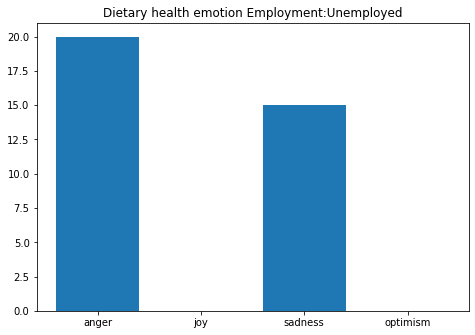

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_employment[3,0], dietary_corr_employment[3,1], dietary_corr_employment[3,2], dietary_corr_employment[3,3]]
plt.title('Dietary health emotion Employment:Unemployed')
ax.bar(x,y2)
plt.show()

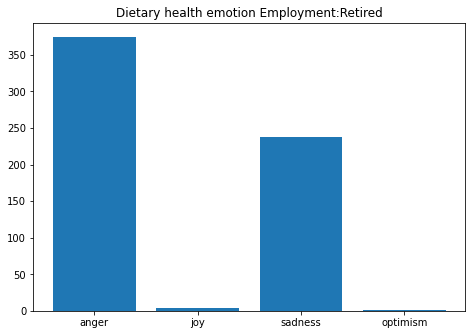

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_employment[4,0], dietary_corr_employment[4,1], dietary_corr_employment[4,2], dietary_corr_employment[4,3]]
plt.title('Dietary health emotion Employment:Retired')
ax.bar(x,y2)
plt.show()

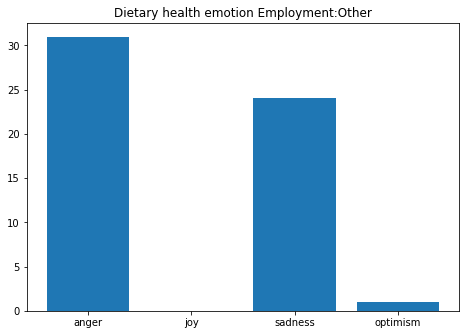

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_employment[5,0], dietary_corr_employment[5,1], dietary_corr_employment[5,2], dietary_corr_employment[5,3]]
plt.title('Dietary health emotion Employment:Other')
ax.bar(x,y2)
plt.show()

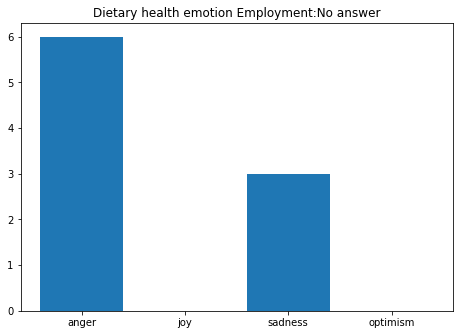

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_employment[6,0], dietary_corr_employment[6,1], dietary_corr_employment[6,2],dietary_corr_employment[6,3]]
plt.title('Dietary health emotion Employment:No answer')
ax.bar(x,y2)
plt.show()

#Brain health correlation to education

In [ ]:
datafile = open('Brain dietary.csv', 'r')
myreader = csv.reader(datafile)
dietary_corr_education = np.array([[0,0,0,0],
                                  [0,0,0,0],
                                  [0,0,0,0],
                                  [0,0,0,0],
                                  [0,0,0,0],
                                  [0,0,0,0]])

for row in myreader:
  if row[9] == '1':
    if row[23] == 'anger':
      dietary_corr_education[0,0] = dietary_corr_education[0,0]+1
    elif row[23] == 'joy':         
      dietary_corr_education[0,1] = dietary_corr_education[0,1]+1
    elif row[23] == 'sadness':
      dietary_corr_education[0,2] = dietary_corr_education[0,2]+1
    else:
      dietary_corr_education[0,3] = dietary_corr_education[0,3]+1
  if row[9] == '2':
    if row[23] == 'anger':
     dietary_corr_education[1,0] = dietary_corr_education[1,0]+1
    elif row[23] == 'joy':         
      dietary_corr_education[1,1] = dietary_corr_education[1,1]+1
    elif row[23] == 'sadness':
      dietary_corr_education[1,2] = dietary_corr_education[1,2]+1
    else:
      dietary_corr_education[1,3] = dietary_corr_education[1,3]+1
  if row[9] == '3':
    if row[23] == 'anger':
      dietary_corr_education[2,0] = dietary_corr_education[2,0]+1
    elif row[23] == 'joy':         
      dietary_corr_education[2,1] = dietary_corr_education[2,1]+1
    elif row[23] == 'sadness':
      dietary_corr_education[2,2] = dietary_corr_education[2,2]+1
    else:
      dietary_corr_education[2,3] = dietary_corr_education[2,3]+1
  if row[9] == '4':
    if row[23] == 'anger':
      dietary_corr_education[3,0] = dietary_corr_education[3,0]+1
    elif row[23] == 'joy':         
      dietary_corr_education[3,1] = dietary_corr_education[3,1]+1
    elif row[23] == 'sadness':
      dietary_corr_education[3,2] = dietary_corr_education[3,2]+1
    else:
      dietary_corr_education[3,3] = dietary_corr_education[3,3]+1
  if row[9] == '5':
    if row[23] == 'anger':
      dietary_corr_education[4,0] = dietary_corr_education[4,0]+1
    elif row[23] == 'joy':         
      dietary_corr_education[4,1] = dietary_corr_education[4,1]+1
    elif row[23] == 'sadness':
      dietary_corr_education[4,2] = dietary_corr_education[4,2]+1
    else:
      dietary_corr_education[4,3] = dietary_corr_education[4,3]+1
  if row[9] == '6':
    if row[23] == 'anger':
      dietary_corr_education[5,0] = dietary_corr_education[5,0]+1
    elif row[23] == 'joy':         
      dietary_corr_education[5,1] = dietary_corr_education[5,1]+1
    elif row[23] == 'sadness':
      dietary_corr_education[5,2] = dietary_corr_education[5,2]+1
    else:
      dietary_corr_education[5,3] = dietary_corr_education[5,3]+1


print(dietary_corr_education)

[[ 10   0   8   0]
 [145   3  70   0]
 [115   0  78   0]
 [282   1 158   2]
 [201   2 126   0]
 [  4   0   2   0]]


##Plot

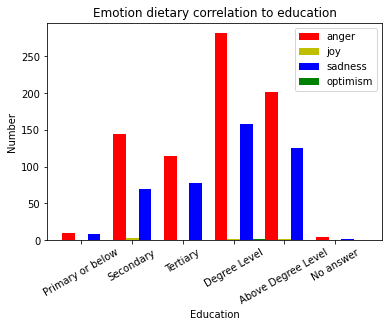

In [ ]:
N = 6
ind = np.arange(N) 
width = 0.25
  
data0 = [dietary_corr_education[0,0],
         dietary_corr_education[1,0],
         dietary_corr_education[2,0],
         dietary_corr_education[3,0],
         dietary_corr_education[4,0],
         dietary_corr_education[5,0]]

bar1 = plt.bar(ind, data0, width, color = 'r')
  
data1 = [dietary_corr_education[0,1],
         dietary_corr_education[1,1], 
         dietary_corr_education[2,1],
         dietary_corr_education[3,1],
         dietary_corr_education[4,1],
         dietary_corr_education[5,1]]

bar2 = plt.bar(ind+width, data1, width, color='y')
  
data2 = [dietary_corr_education[0,2], 
         dietary_corr_education[1,2], 
         dietary_corr_education[2,2], 
         dietary_corr_education[3,2], 
         dietary_corr_education[4,2],
         dietary_corr_education[5,2]]

bar3 = plt.bar(ind+width*2,data2, width, color = 'b')

data3 = [dietary_corr_education[0,3], 
         dietary_corr_education[1,3], 
         dietary_corr_education[2,3], 
         dietary_corr_education[3,3], 
         dietary_corr_education[4,3],
         dietary_corr_education[5,3]]

bar4 = plt.bar(ind+width*3,data3, width, color = 'g')
  
plt.xlabel("Education")
plt.ylabel('Number')
plt.title("Emotion dietary correlation to education")
  
plt.xticks(ind+width,['Primary or below','Secondary','Tertiary','Degree Level', 'Above Degree Level','No answer'], rotation=30)
plt.legend( (bar1, bar2, bar3, bar4), ('anger', 'joy','sadness', 'optimism') )
plt.show()

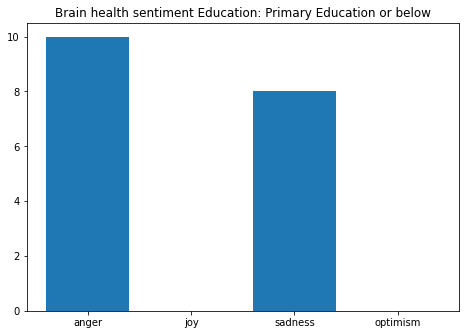

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_education[0,0], dietary_corr_education[0,1], dietary_corr_education[0,2],dietary_corr_education[0,3]]
plt.title('Brain health sentiment Education: Primary Education or below')
ax.bar(x,y2)
plt.show()

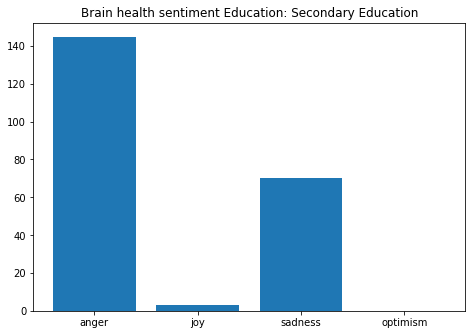

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_education[1,0], dietary_corr_education[1,1], dietary_corr_education[1,2],dietary_corr_education[1,3]]
plt.title('Brain health sentiment Education: Secondary Education')
ax.bar(x,y2)
plt.show()

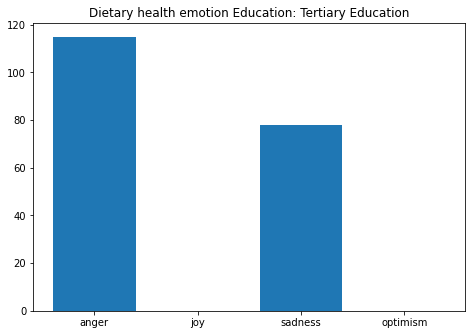

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_education[2,0], dietary_corr_education[2,1], dietary_corr_education[2,2],dietary_corr_education[2,3]]
plt.title('Dietary health emotion Education: Tertiary Education')
ax.bar(x,y2)
plt.show()

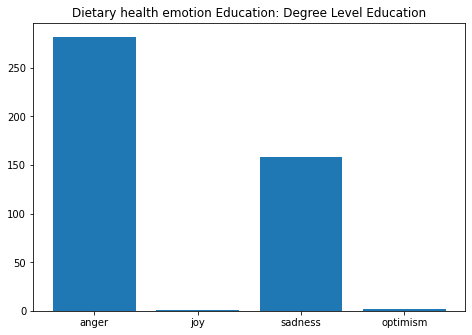

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_education[3,0], dietary_corr_education[3,1], dietary_corr_education[3,2],dietary_corr_education[3,3]]
plt.title('Dietary health emotion Education: Degree Level Education')
ax.bar(x,y2)
plt.show()

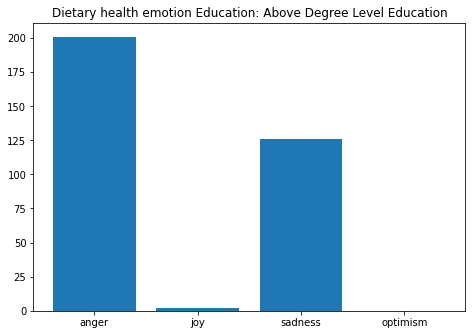

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_education[4,0], dietary_corr_education[4,1], dietary_corr_education[4,2],dietary_corr_education[4,3]]
plt.title('Dietary health emotion Education: Above Degree Level Education')
ax.bar(x,y2)
plt.show()

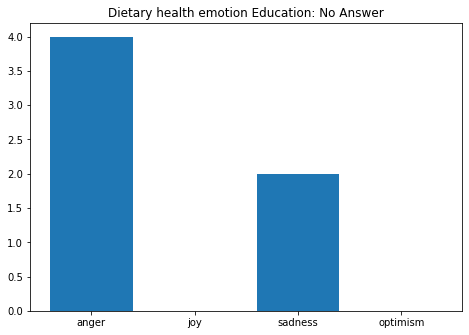

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = ['anger', 'joy','sadness', 'optimism']
y2 = [dietary_corr_education[5,0], dietary_corr_education[5,1], dietary_corr_education[5,2],dietary_corr_education[5,3]]
plt.title('Dietary health emotion Education: No Answer')
ax.bar(x,y2)
plt.show()

#Correlation Coefficient Between Brain health emotion and dietary health emotion

In [ ]:
from scipy.stats import pearsonr
brain = ([28,7,1081,8])
dietary = ([765,6,444,2])
# Calculate Pearson's correlation
corr, _ = pearsonr(brain, dietary)
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.269


In [ ]:
#checking using different method
np.corrcoef(brain,dietary)



array([[1.        , 0.26885502],
       [0.26885502, 1.        ]])

With a correlation coefficient of 0.26 ther is little corelation between brain health emotion and dietary health emotion